# Investigating trends in national ecological footprint accounts

## Qestions for consideration:
How does population affect biocapacity and carbon emmisions? Test the theory that increase in population results in a decrease in biocapacity. (Total and per capita). How does population density fit in?
Compare a few different years, looking at population vs deficit for each year. 

Which countries have the biggest deficit? Is there a correlation between GDP per capita and carbon deficit?

What are the global trends? Are countries increasing or decreasing their deficit year on year?

Is Biocapacity decreasing, or carbon footprint increasing, or both?

Are any countries moving in the right direction? Which ones?

Specifically look at some countries of interest. USA, UK, Norway, Denmark. 

Compare to the global happiness index. Look specifically in Europe. Data only available for 2012 

# Blog Post



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
#Upload the data sets

#NFA 2018.csv: https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018
#UNCountry_LandSize.csv: http://data.un.org/Data.aspx?d=FAO&f=itemCode:6601
#Happiness2012.csv: https://photius.com/rankings/happiness_country_rankings_2012.html

df = pd.read_csv("NFA 2018.csv", encoding = 'utf_8_sig')
df_LandSize = pd.read_csv("UNCountry_LandSize.csv", encoding = 'utf_8_sig')
df_2012Happiness = pd.read_csv("Happiness2012.csv", encoding = 'utf_8_sig')

df = df.loc[df["record"].isin(["BiocapPerCap","BiocapTotGHA","EFConsPerCap","EFConsTotGHA"])]
df.shape

(34808, 15)

In [51]:
df_2012Happiness["year"] = 2012
df_2012Happiness = df_2012Happiness[["Country","Happiness Score", "year"]]
df_2012Happiness = df_2012Happiness.rename(columns = {"Happiness Score":"Happiness_Score_2012","Country":"country"})
df_2012Happiness.head()

country  Happiness_Score_2012  year
0      Denmark                 7.693  2012
1       Norway                 7.655  2012
2  Switzerland                 7.650  2012
3  Netherlands                 7.512  2012
4       Sweden                 7.480  2012

In [52]:
#Reformat landsize data and merge onto main dataset
df_LandSize["Value"].isna().sum()
df_LandSize = df_LandSize.loc[df_LandSize["Value"].isna()==False]
df_LandSize["Year"] = df_LandSize["Year"].astype(int);
df_LandSize.rename(columns = {"Country or Area":"country","Year":"year","Value":"Land_Area"}, inplace = True)
df = pd.merge(left = df, right = df_LandSize[['Land_Area', 'country','year']], on = ['country','year'], how = "left")

df["population_density"] = df["population"]/df["Land_Area"]

In [54]:
print(df.shape)

df.head()

(34808, 17)


country ISO alpha-3 code UN_region  UN_subregion  year        record  \
0  Armenia              ARM      Asia  Western Asia  1992  BiocapPerCap   
1  Armenia              ARM      Asia  Western Asia  1992  BiocapTotGHA   
2  Armenia              ARM      Asia  Western Asia  1992  EFConsPerCap   
3  Armenia              ARM      Asia  Western Asia  1992  EFConsTotGHA   
4  Armenia              ARM      Asia  Western Asia  1993  BiocapPerCap   

      crop_land   grazing_land    forest_land  fishing_ground  built_up_land  \
0  1.611286e-01       0.135023       0.083836        0.013718       0.033669   
1  5.558130e+05  465763.337400  289190.662300    47320.224590  116139.598200   
2  3.909225e-01       0.189137       0.000001        0.004138       0.033669   
3  1.348487e+06  652429.066600       4.327841    14272.803690  116139.598200   
4  1.598552e-01       0.138346       0.085972        0.014035       0.031968   

         carbon         total  Percapita GDP (2010 USD)  population  \
0  0.000000e+00  4.273741e-01                   949.033     3449000   
1  0.000000e+00  1.474227e+06                   949.033     3449000   
2  1.112225e+00  1.730092e+00                   949.033     3449000   
3  3.836620e+06  5.967954e+06                   949.033     3449000   
4  0.000000e+00  4.301759e-01                   886.033     3370000   

   Land_Area  population_density  
0     2847.0         1211.450650  
1     2847.0         1211.450650  
2     2847.0         1211.450650  
3     2847.0         1211.450650  
4     2847.0         1183.702143

In [55]:
#Restructure the data so that each record type is it's own column. 
df_BiocapPerCap = df.loc[df.record =="BiocapPerCap"].rename({"crop_land":"crop_land_BiocapPerCap","grazing_land":"grazing_land_BiocapPerCap", "forest_land":"forest_land_BiocapPerCap","fishing_ground":"fishing_ground_BiocapPerCap","built_up_land":"built_up_land_BiocapPerCap","carbon":"carbon_BiocapPerCap","total":"total_BiocapPerCap"},axis = 1).drop("record",axis = 1)
df_BiocapTotGHA = df.loc[df.record =="BiocapTotGHA"].rename({"crop_land":"crop_land_BiocapTotGHA","grazing_land":"grazing_land_BiocapTotGHA", "forest_land":"forest_land_BiocapTotGHA","fishing_ground":"fishing_ground_BiocapTotGHA","built_up_land":"built_up_land_BiocapTotGHA","carbon":"carbon_BiocapTotGHA","total":"total_BiocapTotGHA"},axis = 1).drop("record",axis = 1)
df_EFConsPerCap = df.loc[df.record =="EFConsPerCap"].rename({"crop_land":"crop_land_EFConsPerCap","grazing_land":"grazing_land_EFConsPerCap", "forest_land":"forest_land_EFConsPerCap","fishing_ground":"fishing_ground_EFConsPerCap","built_up_land":"built_up_land_EFConsPerCap","carbon":"carbon_EFConsPerCap","total":"total_EFConsPerCap"},axis = 1).drop("record",axis = 1)
df_EFConsTotGHA = df.loc[df.record =="EFConsTotGHA"].rename({"crop_land":"crop_land_EFConsTotGHA","grazing_land":"grazing_land_EFConsTotGHA", "forest_land":"forest_land_EFConsTotGHA","fishing_ground":"fishing_ground_EFConsTotGHA","built_up_land":"built_up_land_EFConsTotGHA","carbon":"carbon_EFConsTotGHA","total":"total_EFConsTotGHA"},axis = 1).drop("record",axis = 1)

df_Restructure = pd.merge(df_BiocapPerCap,df_BiocapTotGHA,on = ['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'Percapita GDP (2010 USD)', 'population', 'Land_Area', 'population_density'], how = "left")

df_Restructure = pd.merge(df_Restructure,df_EFConsPerCap, on = ['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'Percapita GDP (2010 USD)','population', 'Land_Area', 'population_density'], how = "left")

df_Restructure = pd.merge(df_Restructure,df_EFConsTotGHA, on = ['country', 'ISO alpha-3 code', 'UN_region', 'UN_subregion', 'year',
       'Percapita GDP (2010 USD)','population', 'Land_Area', 'population_density'], how = "left")

df_Restructure["total_deficit"] = df_Restructure["total_EFConsTotGHA"]- df_Restructure["total_BiocapTotGHA"]
df_Restructure["total_deficit_per_cap"] = df_Restructure["total_EFConsPerCap"]- df_Restructure["total_BiocapPerCap"]

In [56]:
df_slim = df_Restructure[["country","year","total_EFConsTotGHA", "total_BiocapTotGHA", "total_EFConsPerCap","total_BiocapPerCap","total_deficit","total_deficit_per_cap","population","UN_region","Land_Area","population_density","Percapita GDP (2010 USD)"]]
df_slim.head()

country  year  total_EFConsTotGHA  total_BiocapTotGHA  total_EFConsPerCap  \
0  Armenia  1992         5967953.592         1474226.795            1.730092   
1  Armenia  1993         3903530.447         1449550.644            1.158431   
2  Armenia  1994         3671166.697         1451930.964            1.115877   
3  Armenia  1995         3314056.537         1475715.242            1.028198   
4  Armenia  1996         3294021.456         1600580.482            1.038000   

   total_BiocapPerCap  total_deficit  total_deficit_per_cap  population  \
0            0.427374    4493726.797               1.302718     3449000   
1            0.430176    2453979.803               0.728255     3370000   
2            0.441324    2219235.733               0.674552     3290000   
3            0.457846    1838341.295               0.570352     3223000   
4            0.504369    1693440.974               0.533631     3173000   

  UN_region  Land_Area  population_density  Percapita GDP (2010 USD)  
0      Asia     2847.0         1211.450650                   949.033  
1      Asia     2847.0         1183.702143                   886.033  
2      Asia     2847.0         1155.602388                   956.471  
3      Asia     2847.0         1132.068844                  1043.540  
4      Asia     2847.0         1114.506498                  1121.880

In [19]:
print("2014 global deficit: ",df_slim.loc[df_slim["country"]=="World"].loc[df_slim["year"] == 2014].total_deficit.values[0])
print("2004 global deficit: ",df_slim.loc[df_slim["country"]=="World"].loc[df_slim["year"] == 1969].total_deficit.values[0])

2014 global deficit:  8380539560.0
2004 global deficit:  -451744947.0


In [20]:
#Fuction to produce a line graph
def plot_line(df, x_column, y_column, title, xlabel, ylabel):

    plt.plot(df[x_column],df[y_column])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Text(0,0.5,'Total Deficit (Billion Global Hectares)')

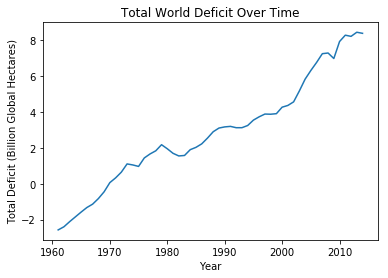

In [57]:
plt.plot(df_slim.loc[df_slim["country"]=="World"]["year"],df_slim.loc[df_slim["country"]=="World"]["total_deficit"]/1000000000)    
    
plt.ticklabel_format(style = 'plain')
plt.title("Total World Deficit Over Time")
plt.xlabel("Year")
plt.ylabel("Total Deficit (Billion Global Hectares)")

Text(0,0.5,'Total Deficit (Global Hectares)')

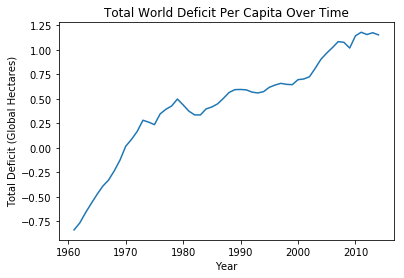

In [58]:
plt.plot(df_slim.loc[df_slim["country"]=="World"]["year"],df_slim.loc[df_slim["country"]=="World"]["total_deficit_per_cap"])    
    
plt.ticklabel_format(style = 'plain')
plt.title("Total World Deficit Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("Total Deficit (Global Hectares)")

It is clear that the deficit is getting worse on a global scale. Even when population is taken into account, the deficit per capita on a global level is also increasing in an almost linear fashion.  

In [59]:
#Remove "world" as a country. df_slim_2014 is now the main dataset that most exploratory analysis is done on. 
df_slim_2014 = df_slim.loc[df_slim["year"] == 2014].loc[df_slim["country"]!="World"]
df_slim_2014.head(10)

country  year  total_EFConsTotGHA  total_BiocapTotGHA  \
22               Armenia  2014        6.068199e+06        2.362550e+06   
76           Afghanistan  2014        2.442466e+07        1.594269e+07   
130              Albania  2014        6.188639e+06        3.038634e+06   
184              Algeria  2014        9.534057e+07        2.108411e+07   
238               Angola  2014        3.776760e+07        5.548913e+07   
273  Antigua and Barbuda  2014        3.803687e+05        8.483893e+04   
327            Argentina  2014        1.585845e+08        2.883548e+08   
381            Australia  2014        1.626579e+08        3.130207e+08   
435              Austria  2014        5.004903e+07        2.567366e+07   
479              Bahamas  2014        1.847638e+06        3.577704e+06   

     total_EFConsPerCap  total_BiocapPerCap  total_deficit  \
22             2.018595            0.785906   3.705649e+06   
76             0.772260            0.504077   8.481969e+06   
130            2.141635            1.051547   3.150004e+06   
184            2.448755            0.541531   7.425646e+07   
238            1.558873            2.290336  -1.772152e+07   
273            4.184474            0.933322   2.955297e+05   
327            3.689728            6.709047  -1.297703e+08   
381            6.885746           13.251010  -1.503628e+08   
435            5.876424            3.014430   2.437537e+07   
479            4.823440            9.339948  -1.730067e+06   

     total_deficit_per_cap  population                        UN_region  \
22                1.232689     3006000                             Asia   
76                0.268183    31628000                             Asia   
130               1.090088     2890000                           Europe   
184               1.907225    38934000                           Africa   
238              -0.731463    24228000                           Africa   
273               3.251152       91000  Latin America and the Caribbean   
327              -3.019318    42980000  Latin America and the Caribbean   
381              -6.365263    23622000                          Oceania   
435               2.861994     8517000                           Europe   
479              -4.516509      383000  Latin America and the Caribbean   

     Land_Area  population_density  Percapita GDP (2010 USD)  
22      2847.0         1055.848261                  3827.340  
76     65286.0          484.453022                   610.242  
130     2740.0         1054.744526                  4413.560  
184   238174.0          163.468725                  4675.890  
238   124670.0          194.337050                  3747.570  
273       44.0         2068.181818                 12403.500  
327   273669.0          157.051036                 10323.200  
381   768230.0           30.748604                 54394.300  
435     8252.3         1032.075906                 47886.600  
479     1001.0          382.617383                 21078.700

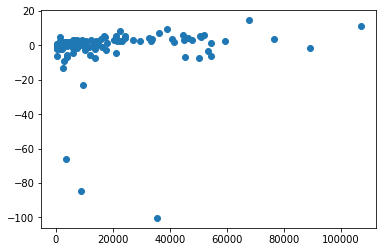

In [60]:
GDP_PerCapita_2014 = df_slim_2014["Percapita GDP (2010 USD)"]
Deficit_2014 = df_slim_2014["total_deficit_per_cap"]

plt.scatter(GDP_PerCapita_2014, Deficit_2014)

In [61]:
#Investigating the outliers on the previous scatter plot
df_slim_2014.loc[df_slim_2014["total_deficit_per_cap"]<-20]

country  year  total_EFConsTotGHA  total_BiocapTotGHA  \
2539  French Guiana  2014        6.783871e+05         26894373.54   
2708          Gabon  2014        4.582361e+06         43365974.04   
3181         Guyana  2014        2.193907e+06         52557273.28   
7042       Suriname  2014        1.956741e+06         47480147.89   

      total_EFConsPerCap  total_BiocapPerCap  total_deficit  \
2539            2.594552          102.859925  -2.621599e+07   
2708            2.715200           25.695766  -3.878361e+07   
3181            2.872009           68.801878  -5.036337e+07   
7042            3.635390           88.212402  -4.552341e+07   

      total_deficit_per_cap  population                        UN_region  \
2539            -100.265374      261000  Latin America and the Caribbean   
2708             -22.980566     1688000                           Africa   
3181             -65.929869      764000  Latin America and the Caribbean   
7042             -84.577013      538000  Latin America and the Caribbean   

      Land_Area  population_density  Percapita GDP (2010 USD)  
2539     8279.0           31.525547                  35657.50  
2708    25767.0           65.510149                   9508.15  
3181    19685.0           38.811278                   3598.29  
7042    15600.0           34.487179                   8942.96

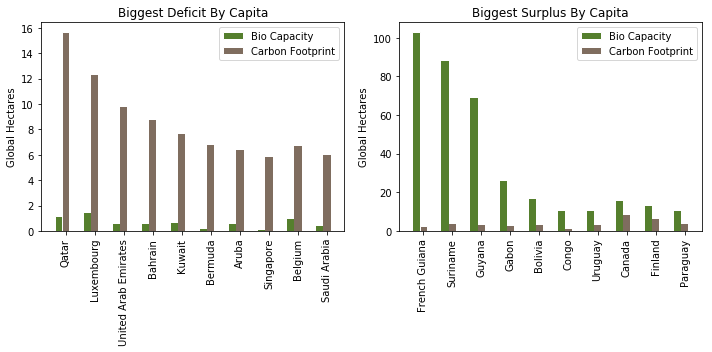

In [62]:
#Investigating the biggest deficit and biggest surplus countries. 
#Plot side by side charts shoing Biocapacity next to Carbon Footprint.

worst_countries = df_slim_2014.sort_values(by = "total_deficit_per_cap", ascending = False).head(10)
best_countries = df_slim_2014.sort_values(by = "total_deficit_per_cap").head(10)

barWidth = 0.25

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
bars1 = worst_countries["total_BiocapPerCap"]
bars2 = worst_countries["total_EFConsPerCap"]


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#557f2d', width=barWidth, edgecolor='white', label='Bio Capacity')
plt.bar(r2, bars2, color='#7f6d5f', width=barWidth, edgecolor='white', label='Carbon Footprint')
plt.ylabel("Global Hectares")
plt.title("Biggest Deficit By Capita")
plt.xticks([r + barWidth for r in range(len(bars1))], worst_countries["country"], rotation = 90)
plt.legend()


plt.subplot(1,2,2)
bars1 = best_countries["total_BiocapPerCap"]
bars2 = best_countries["total_EFConsPerCap"]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#557f2d', width=barWidth, edgecolor='white', label='Bio Capacity')
plt.bar(r2, bars2, color='#7f6d5f', width=barWidth, edgecolor='white', label='Carbon Footprint')
plt.ylabel("Global Hectares")
plt.xticks([r + barWidth for r in range(len(bars1))], best_countries["country"], rotation = 90)
plt.title("Biggest Surplus By Capita")
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
#Investigating outliers on the GDP vs Deficit scatter above
df_slim_2014.loc[df_slim_2014["Percapita GDP (2010 USD)"]>60000]

country  year  total_EFConsTotGHA  total_BiocapTotGHA  \
5646       Norway  2014         31056398.95        3.815468e+07   
6258        Qatar  2014         34001388.64        2.557385e+06   
7220  Switzerland  2014         39828806.54        8.921432e+06   
8489   Luxembourg  2014          6837411.41        7.657397e+05   

      total_EFConsPerCap  total_BiocapPerCap  total_deficit  \
5646            6.032746            7.411598  -7.098285e+06   
6258           15.653982            1.177401   3.144400e+07   
7220            4.850440            1.086472   3.090737e+07   
8489           12.284842            1.375812   6.071672e+06   

      total_deficit_per_cap  population UN_region  Land_Area  \
5646              -1.378851     5148000    Europe    36512.3   
6258              14.476581     2172000      Asia     1149.0   
7220               3.763968     8211000    Europe     3951.6   
8489              10.909030      557000    Europe      243.0   

      population_density  Percapita GDP (2010 USD)  
5646          140.993583                   89275.0  
6258         1890.339426                   67901.2  
7220         2077.892499                   76410.9  
8489         2292.181070                  107153.0

In [33]:
#Remove outliers and investigate the remiaining countries
df_slim_2014_2 = df_slim_2014[df_slim_2014["Percapita GDP (2010 USD)"]<60000]
df_slim_2014_2 = df_slim_2014_2[df_slim_2014_2["total_deficit_per_cap"]>-20]

Text(0,0.5,'Carbon Deficit')

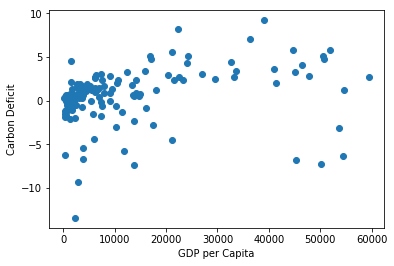

In [34]:
GDP_PerCapita_2014 = df_slim_2014_2["Percapita GDP (2010 USD)"]
Deficit_2014 = df_slim_2014_2["total_deficit_per_cap"]

plt.scatter(GDP_PerCapita_2014, Deficit_2014)
plt.xlabel("GDP per Capita")
plt.ylabel("Carbon Deficit")

In [69]:
df_slim_2014_wealthy = df_slim_2014[df_slim_2014["Percapita GDP (2010 USD)"]>11000]
print("Mean Biocapacity: ",df_slim_2014_wealthy["total_BiocapPerCap"].mean())
print("Mean Carbon Footprint: ",df_slim_2014_wealthy["total_EFConsPerCap"].mean())
print("Mean Deficit: ",df_slim_2014_wealthy["total_deficit_per_cap"].mean())

Mean Biocapacity:  5.35311130222
Mean Carbon Footprint:  5.56650572067
Mean Deficit:  0.213394418444


In [70]:
df_slim_2014_poor = df_slim_2014[df_slim_2014["Percapita GDP (2010 USD)"]<=11000]
print("Mean Biocapacity: ",df_slim_2014_poor["total_BiocapPerCap"].mean())
print("Mean Carbon Footprint: ",df_slim_2014_poor["total_EFConsPerCap"].mean())
print("Mean Deficit: ",df_slim_2014_poor["total_deficit_per_cap"].mean())

Mean Biocapacity:  3.49986768722
Mean Carbon Footprint:  2.20140039705
Mean Deficit:  -1.29846729018


Text(0,0.5,'Carbon Deficit')

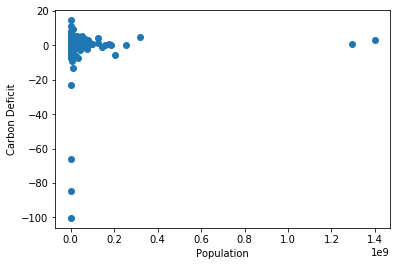

In [81]:
#Produce scatter plot of Population vs Deficit per cap
Population_2014 = df_slim_2014["population"]
Deficit_2014 = df_slim_2014["total_deficit_per_cap"]

plt.scatter(Population_2014, Deficit_2014)
plt.xlabel("Population")
plt.ylabel("Carbon Deficit")

In [85]:
df_slim_2014.loc[df_slim_2014["population"]>800000000]

country  year  total_EFConsTotGHA  total_BiocapTotGHA  \
3420   India  2014        1.450832e+09        5.856959e+08   
8569   China  2014        5.196178e+09        1.365995e+09   

      total_EFConsPerCap  total_BiocapPerCap  total_deficit  \
3420            1.120083            0.452174   8.651362e+08   
8569            3.709965            0.975293   3.830182e+09   

      total_deficit_per_cap  population UN_region  Land_Area  \
3420               0.667909  1295292000      Asia  297319.00   
8569               2.734673  1400602000      Asia  942470.13   

      population_density  Percapita GDP (2010 USD)  deficit_share  
3420         4356.573243                   1646.78       0.108187  
8569         1486.096965                   6108.24       0.478971

Text(0,0.5,'Carbon Deficit')

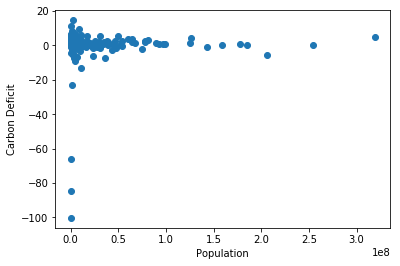

In [71]:
#Remove population outliers and investigate further
Population_2014_low = df_slim_2014.loc[df_slim_2014["population"]<800000000]["population"]
Deficit_2014_low_pop = df_slim_2014.loc[df_slim_2014["population"]<800000000]["total_deficit_per_cap"]

plt.scatter(Population_2014_low, Deficit_2014_low_pop)
plt.xlabel("Population")
plt.ylabel("Carbon Deficit")

Text(0.5,0,'Carbon Deficit')

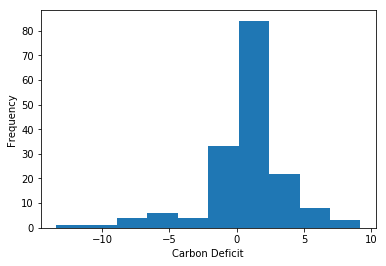

In [88]:
#Looking into where most countries fall in the deficit per cap figure
plt.hist(df_slim_2014_2["total_deficit_per_cap"])
plt.ylabel("Frequency")
plt.xlabel("Carbon Deficit")

Text(0,0.5,'Global Population')

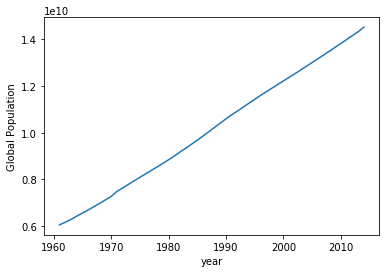

In [41]:
plt.plot(total_pop["year"],total_pop["population"])

plt.xlabel("year")
plt.ylabel("Global Population")

Text(0,0.5,'Happiness Score')

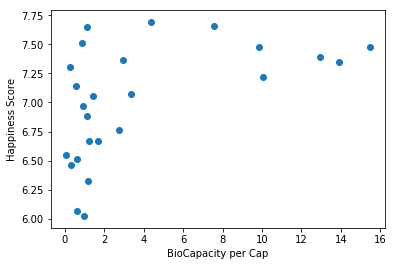

In [74]:
#Investigating if happiness is related ti Biocapacity. Using a cutoff of $25000 GDP PC as the data has a natural split at this
#amount. 
plt.scatter(df_slim_2012["total_BiocapPerCap"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000],df_slim_2012["Happiness_Score_2012"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000])
plt.xlabel("BioCapacity per Cap")
plt.ylabel("Happiness Score")

Text(0,0.5,'Happiness Score')

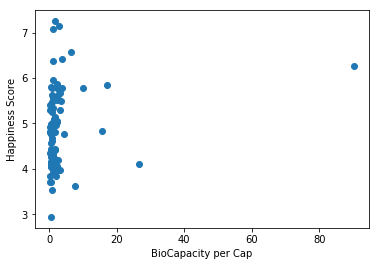

In [75]:
plt.scatter(df_slim_2012["total_BiocapPerCap"].loc[df_slim_2012["Percapita GDP (2010 USD)"]<11000],df_slim_2012["Happiness_Score_2012"].loc[df_slim_2012["Percapita GDP (2010 USD)"]<11000])
plt.xlabel("BioCapacity per Cap")
plt.ylabel("Happiness Score")

Text(0,0.5,'Happiness Score')

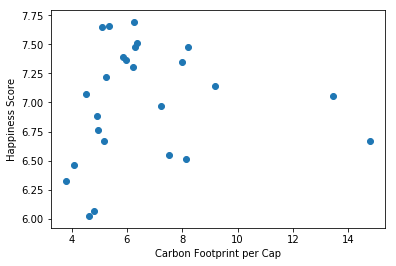

In [76]:
plt.scatter(df_slim_2012["total_EFConsPerCap"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000],df_slim_2012["Happiness_Score_2012"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000])

plt.xlabel("Carbon Footprint per Cap")
plt.ylabel("Happiness Score")

Text(0,0.5,'Happiness Score')

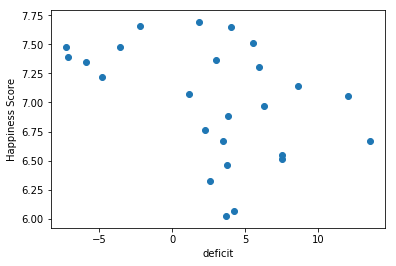

In [77]:
plt.scatter(df_slim_2012["total_deficit_per_cap"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000],df_slim_2012["Happiness_Score_2012"].loc[df_slim_2012["Percapita GDP (2010 USD)"]>25000])
plt.xlabel("deficit")
plt.ylabel("Happiness Score")

Very little can be concluded in relation to the happiness index. There appears to be some sort of correlation between happiness and biocapacity in wealthy nations. 

Text(0,0.5,'GDP Per Cap')

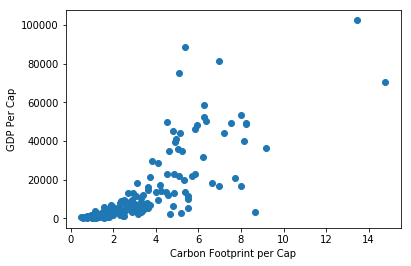

In [79]:
#Investigating carbon footprint in relation to GDP Per Capita
plt.scatter(df_slim_2012["total_EFConsPerCap"].loc[df_slim_2012["total_BiocapPerCap"]<80],df_slim_2012["Percapita GDP (2010 USD)"].loc[df_slim_2012["total_BiocapPerCap"]<80])
plt.xlabel("Carbon Footprint per Cap")
plt.ylabel("GDP Per Cap")

There looks to be a strong relationship between GDP per Capita and Carbon Footprint per Capita

Text(0,0.5,'GDP Per Cap')

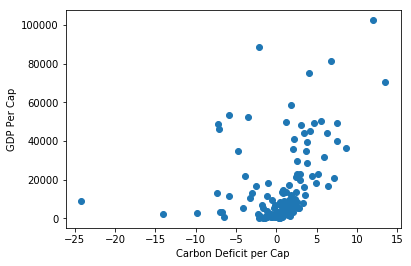

In [80]:
plt.scatter(df_slim_2012["total_deficit_per_cap"].loc[df_slim_2012["total_deficit_per_cap"]>-60],df_slim_2012["Percapita GDP (2010 USD)"].loc[df_slim_2012["total_deficit_per_cap"]>-60])
plt.xlabel("Carbon Deficit per Cap")
plt.ylabel("GDP Per Cap")

Text(0.5,1,'Happiness vs GDP in Europe')

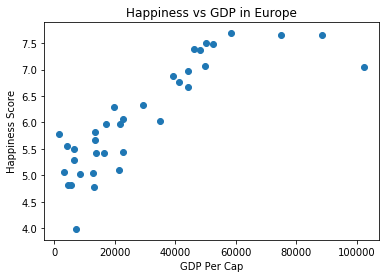

In [81]:
plt.scatter(df_slim_2012["Percapita GDP (2010 USD)"].loc[df_slim_2012["total_BiocapPerCap"]<80].loc[df_slim_2012["UN_region"] == "Europe"],df_slim_2012["Happiness_Score_2012"].loc[df_slim_2012["total_BiocapPerCap"]<80].loc[df_slim_2012["UN_region"] == "Europe"])
plt.xlabel("GDP Per Cap")
plt.ylabel("Happiness Score")
plt.title("Happiness vs GDP in Europe")

country  year  total_EFConsTotGHA  total_BiocapTotGHA  \
0      Armenia  2012        6.371811e+06        2.230728e+06   
1  Afghanistan  2012        2.406439e+07        1.541892e+07   
2      Albania  2012        6.426738e+06        3.084854e+06   
3      Algeria  2012        9.049695e+07        2.340175e+07   
4       Angola  2012        2.621342e+07        5.338946e+07   

   total_EFConsPerCap  total_BiocapPerCap  total_deficit  \
0            2.139383            0.748984   4.141082e+06   
1            0.809518            0.518688   8.645471e+06   
2            2.230987            1.070881   3.341884e+06   
3            2.417158            0.625057   6.709520e+07   
4            1.155509            2.353451  -2.717604e+07   

   total_deficit_per_cap  population UN_region  Land_Area  population_density  \
0               1.390399     2978000      Asia     2847.0         1046.013347   
1               0.290831    29727000      Asia    65286.0          455.334988   
2               1.160107     2881000    Europe     2740.0         1051.459854   
3               1.792101    37439000    Africa   238174.0          157.191801   
4              -1.197942    22686000    Africa   124670.0          181.968397   

   Percapita GDP (2010 USD)  Happiness_Score_2012  
0                  3606.480                 4.316  
1                   630.427                 4.040  
2                  4276.920                 5.550  
3                  4564.440                 5.422  
4                  3591.030                 5.589

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


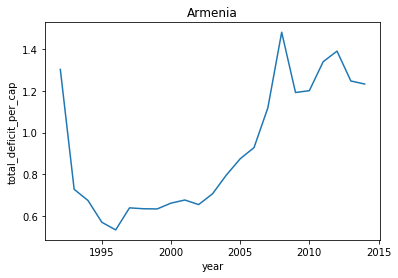

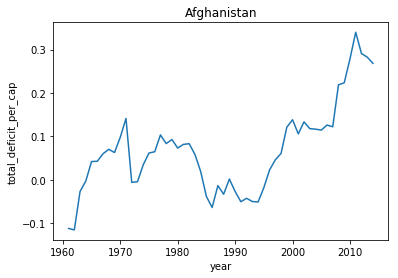

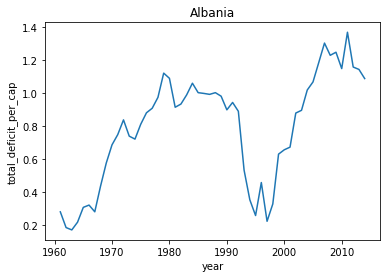

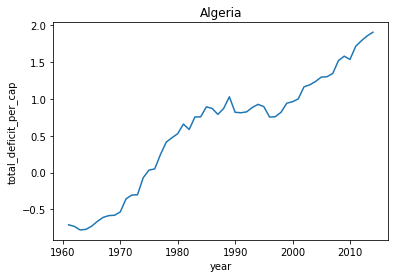

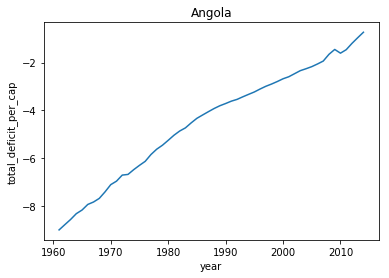

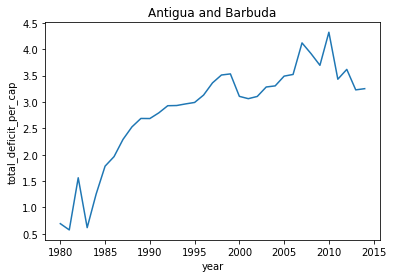

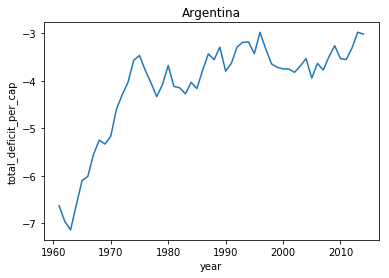

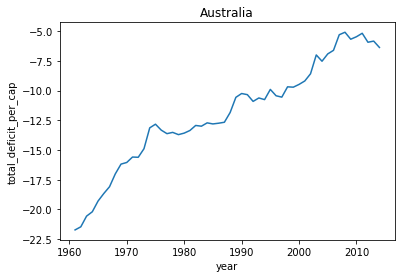

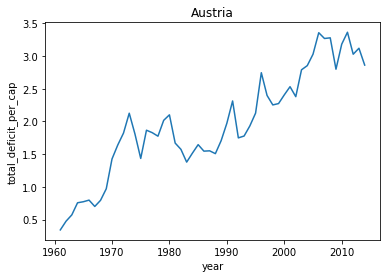

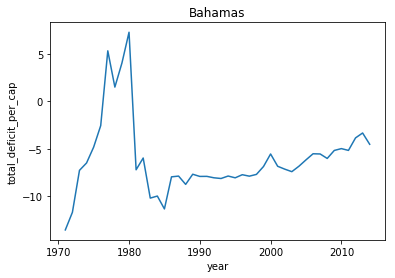

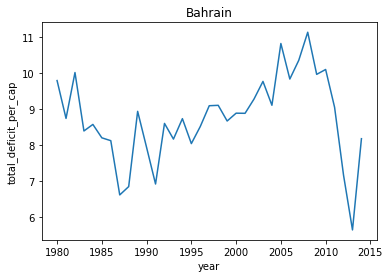

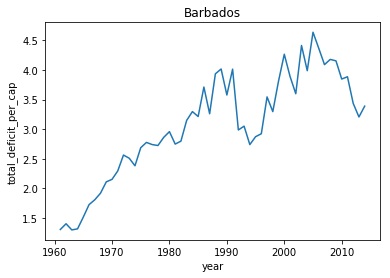

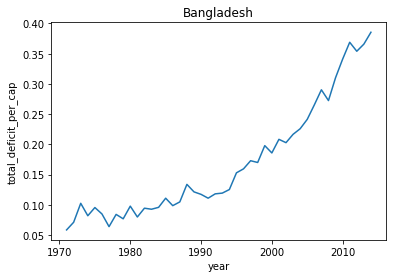

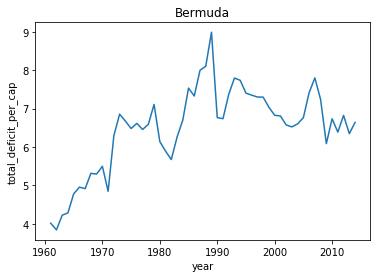

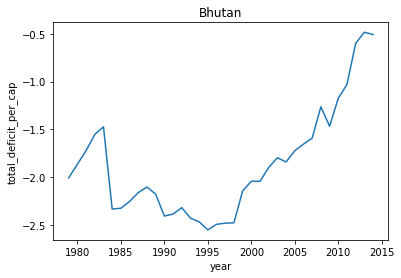

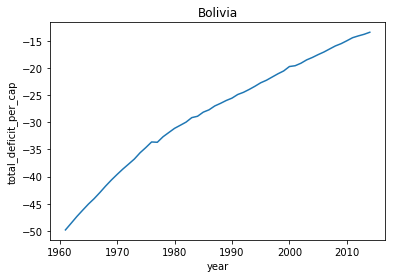

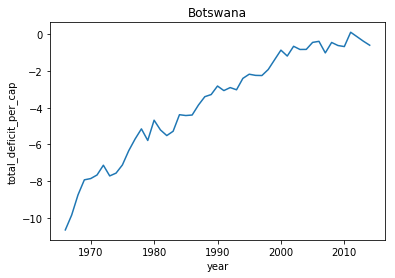

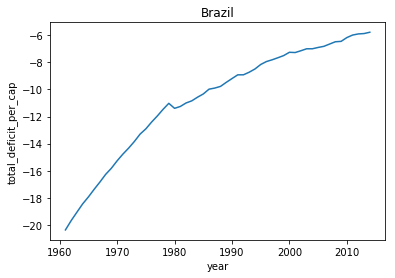

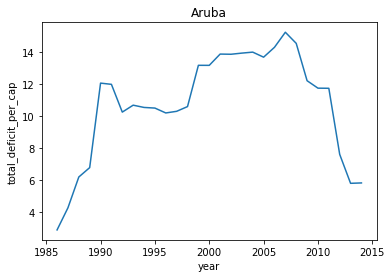

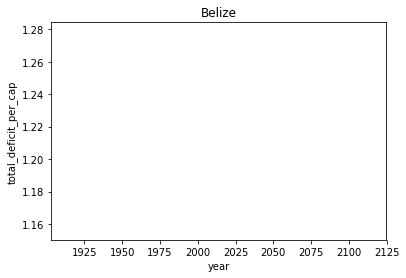

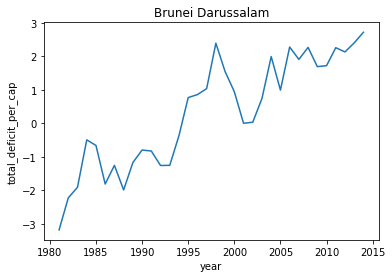

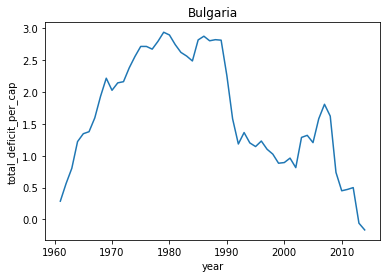

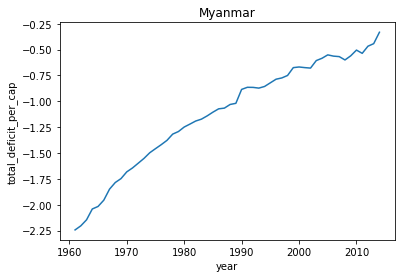

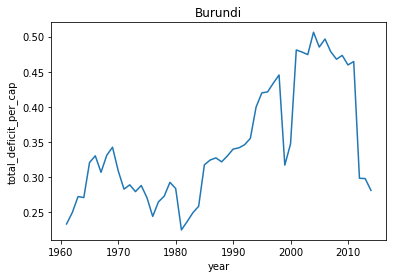

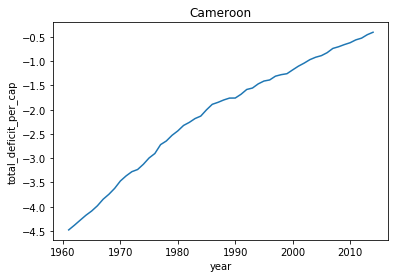

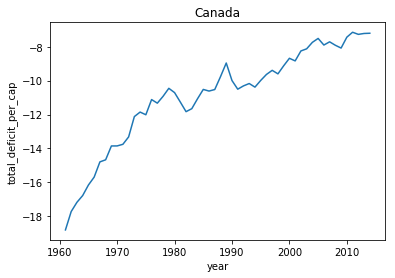

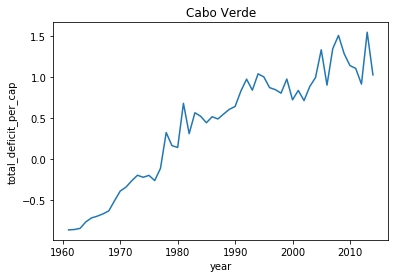

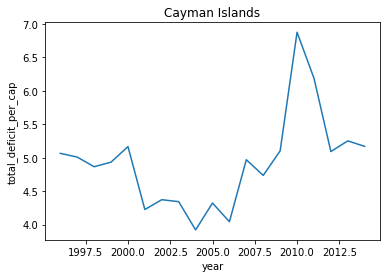

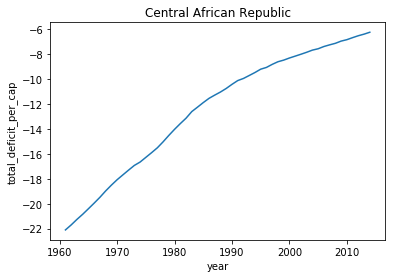

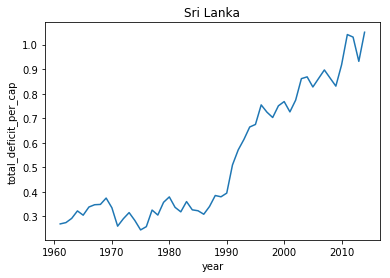

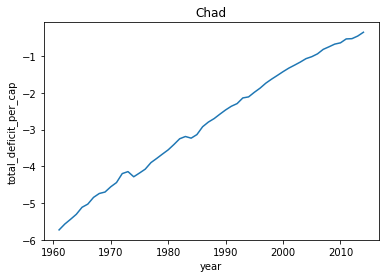

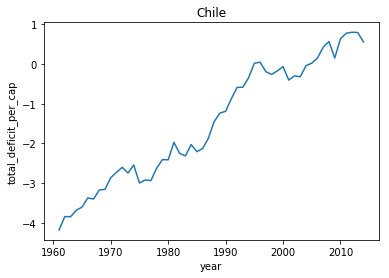

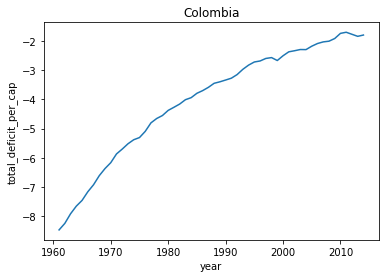

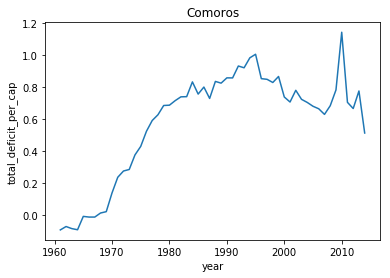

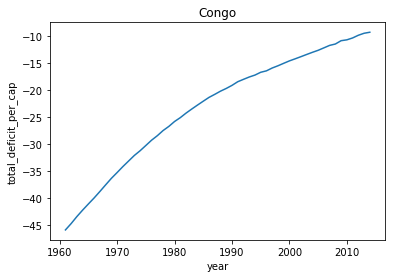

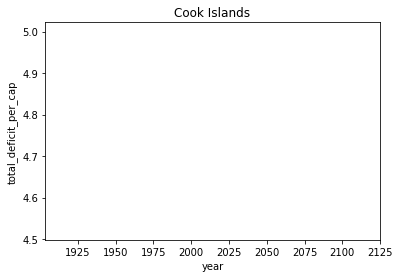

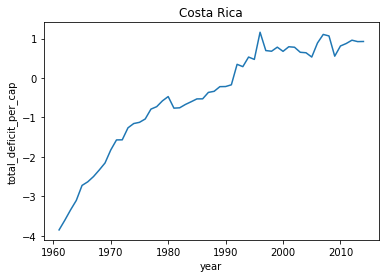

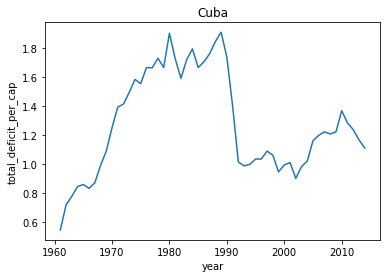

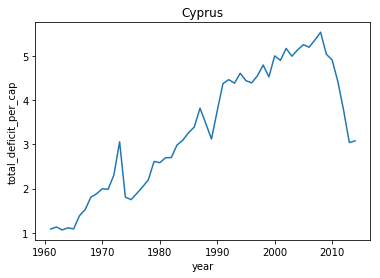

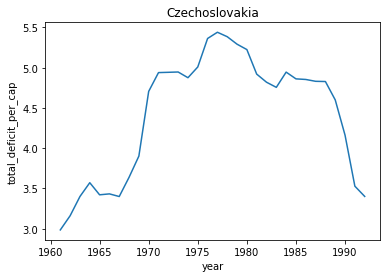

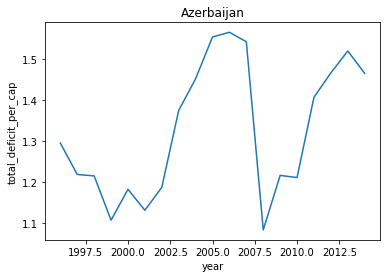

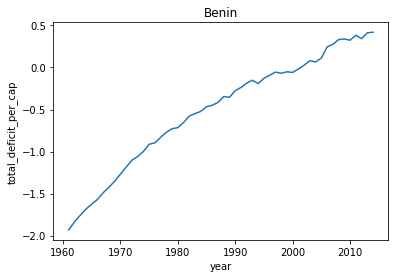

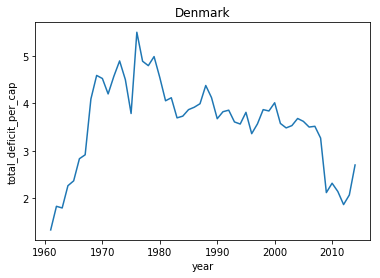

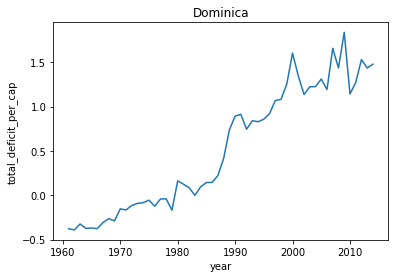

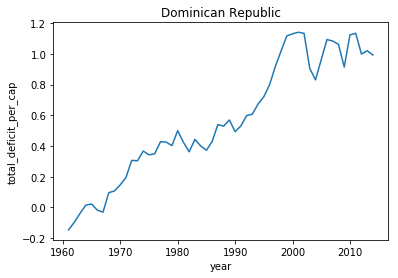

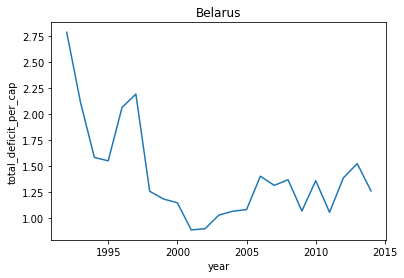

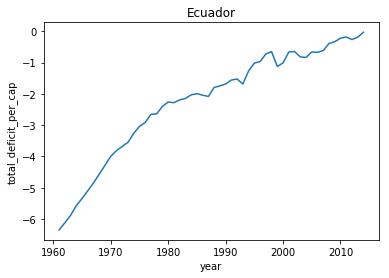

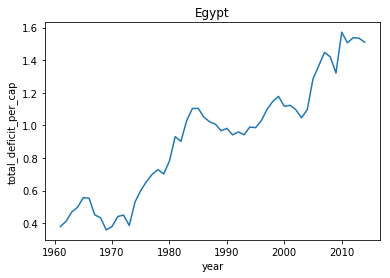

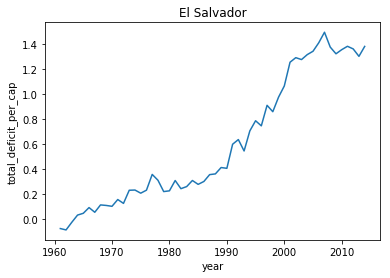

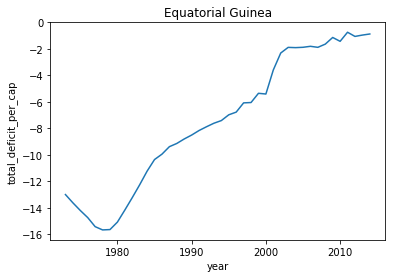

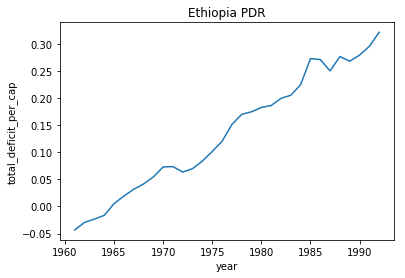

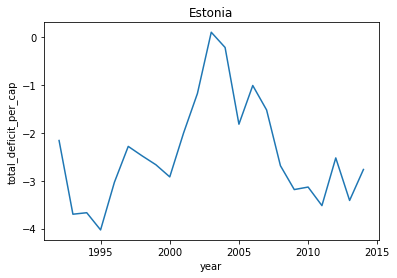

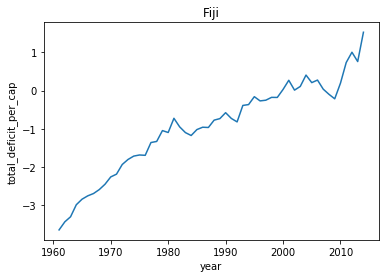

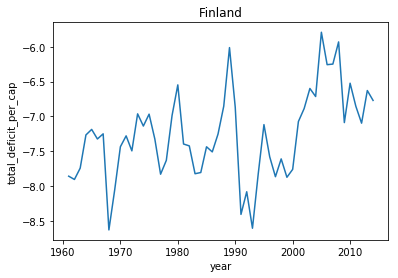

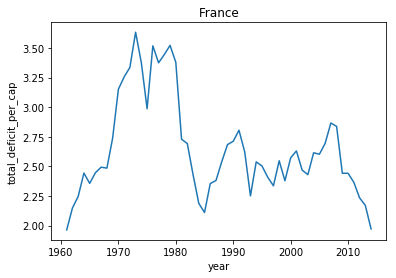

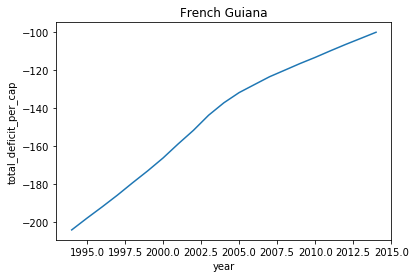

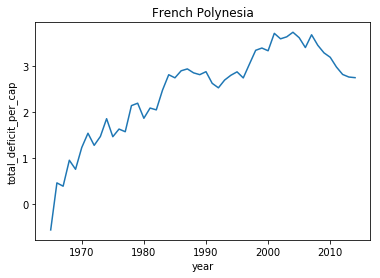

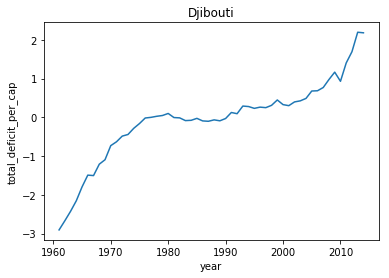

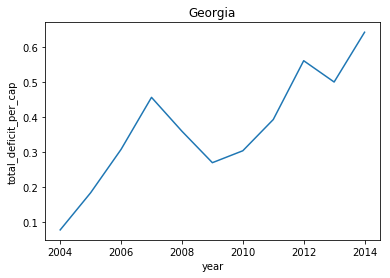

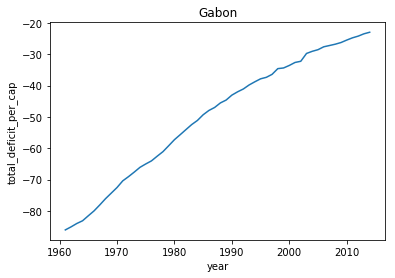

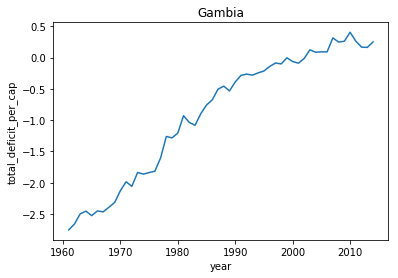

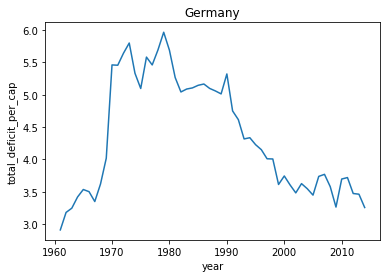

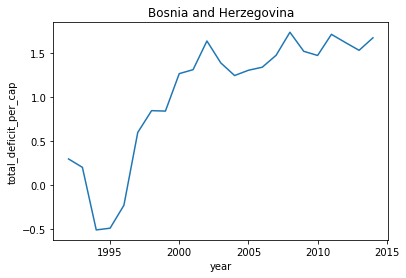

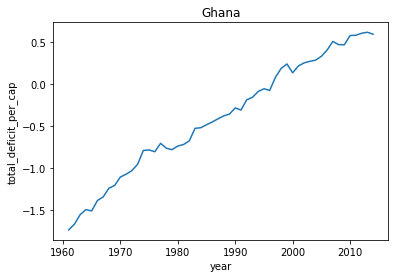

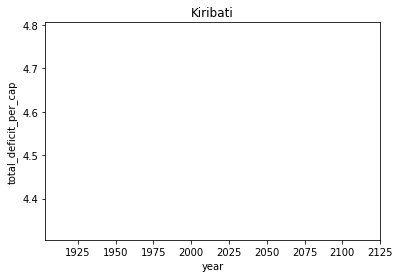

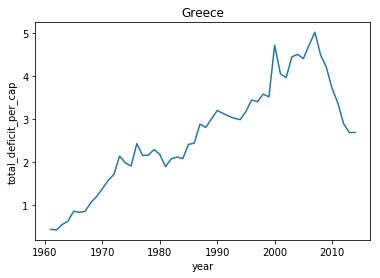

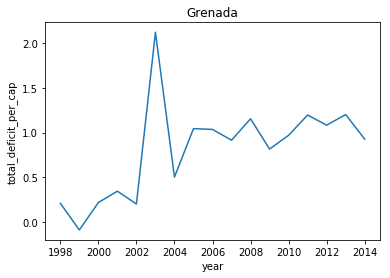

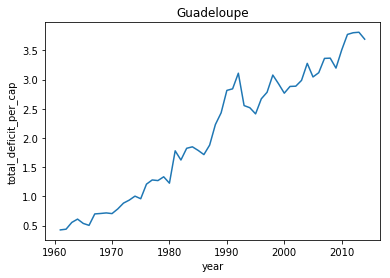

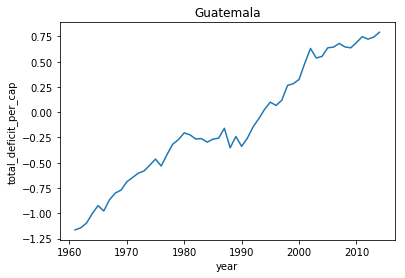

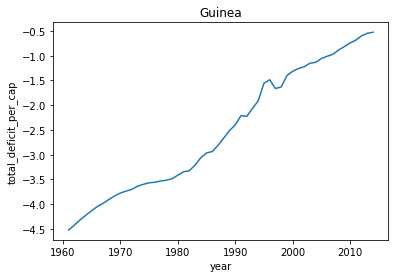

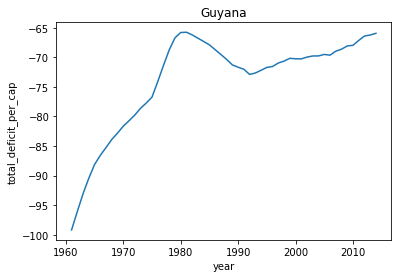

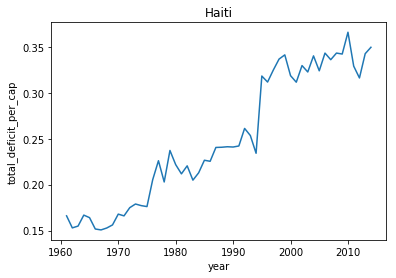

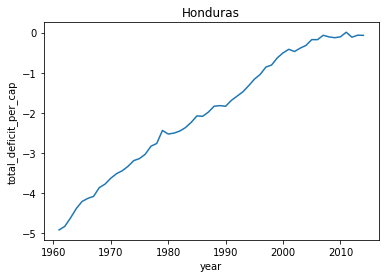

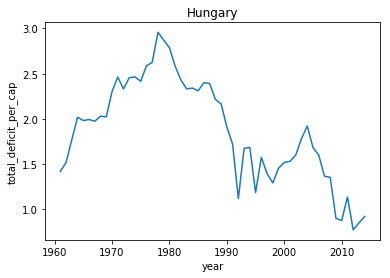

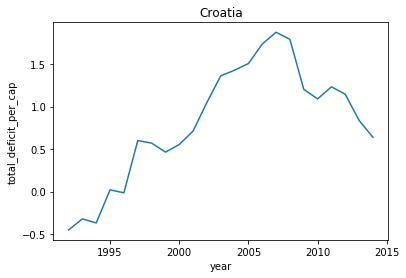

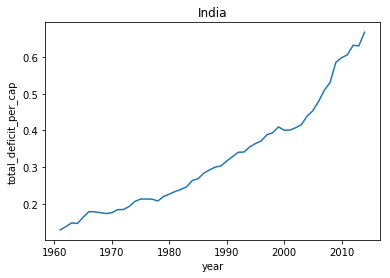

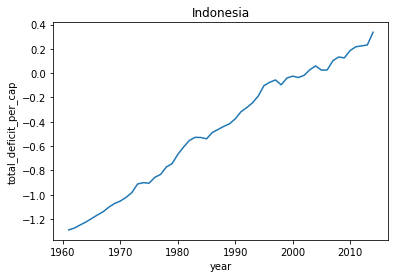

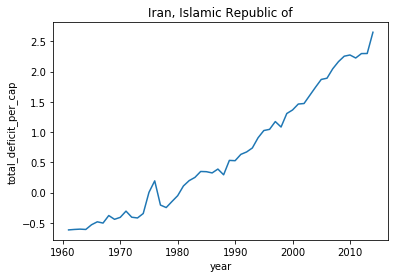

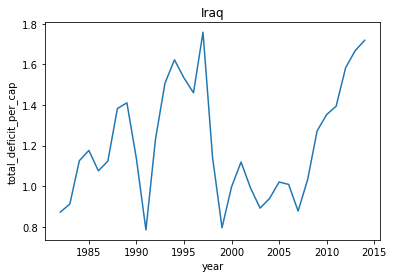

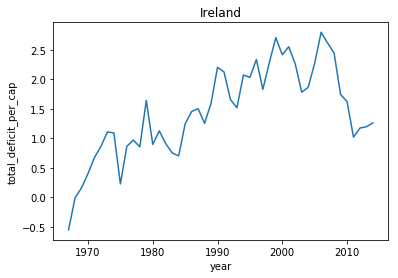

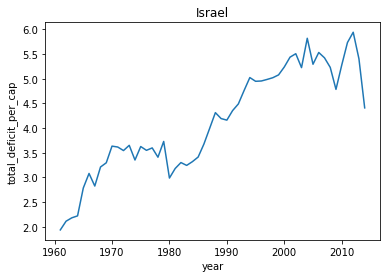

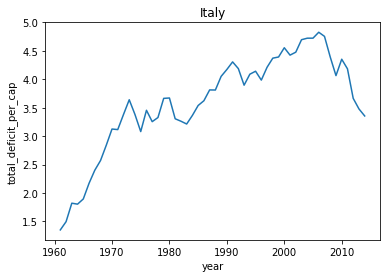

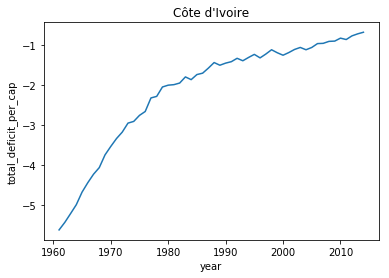

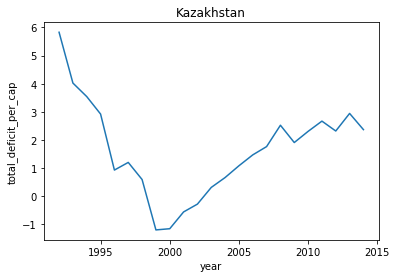

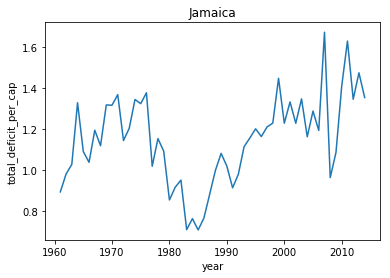

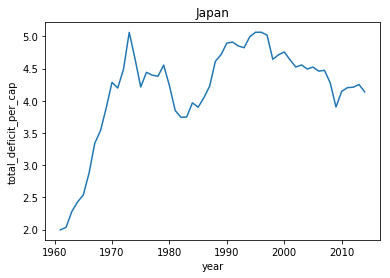

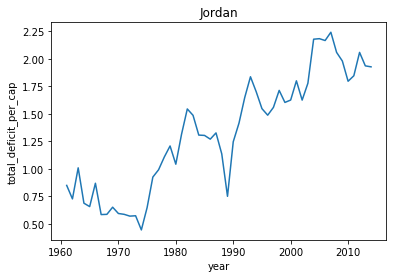

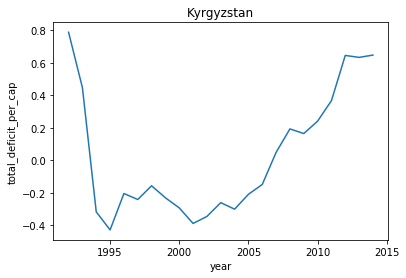

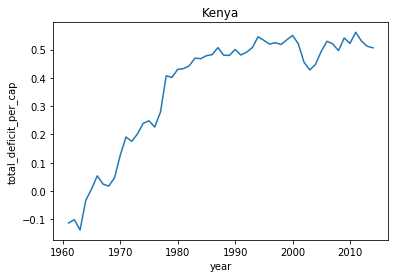

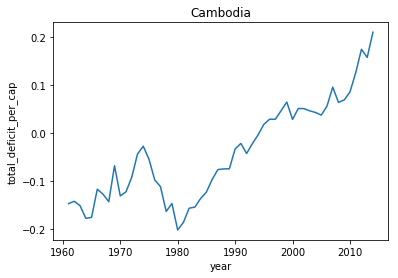

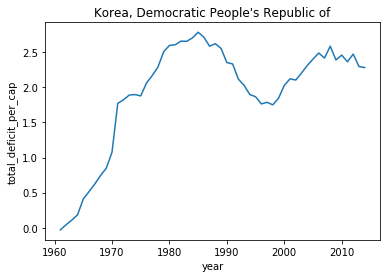

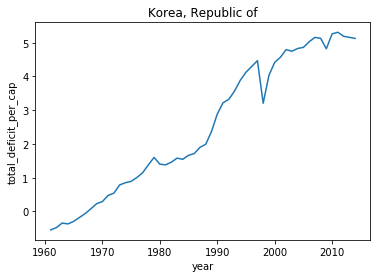

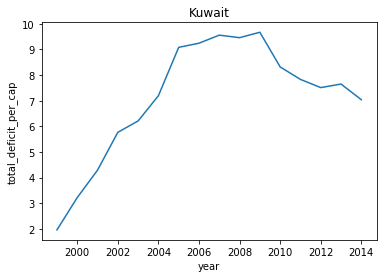

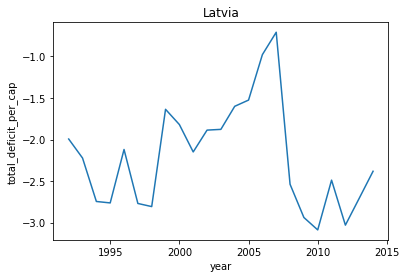

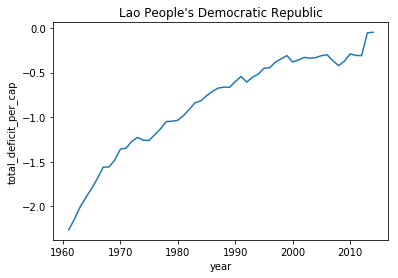

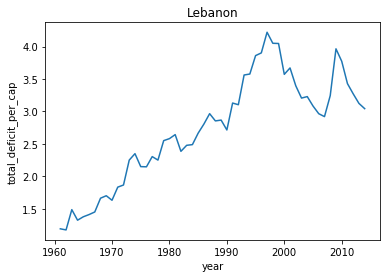

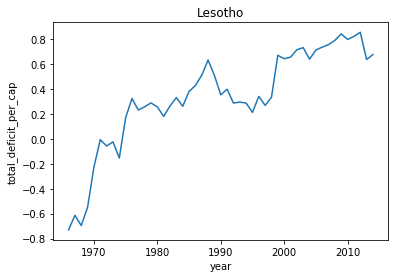

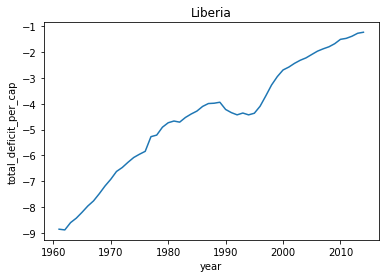

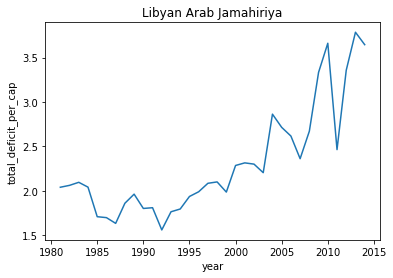

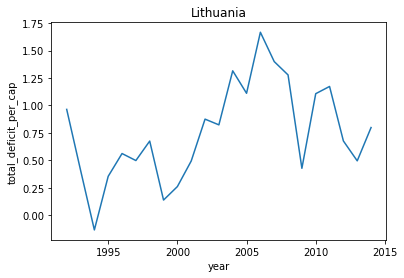

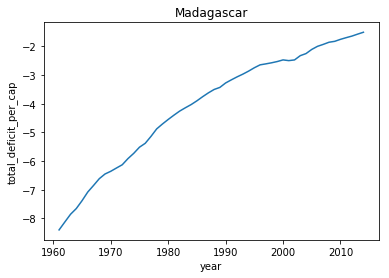

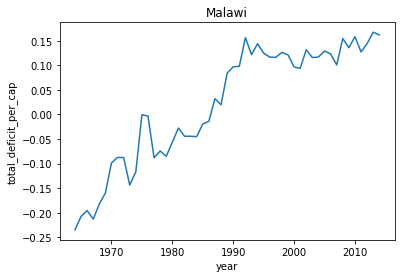

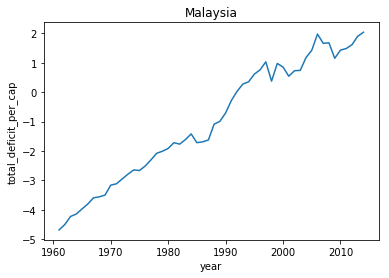

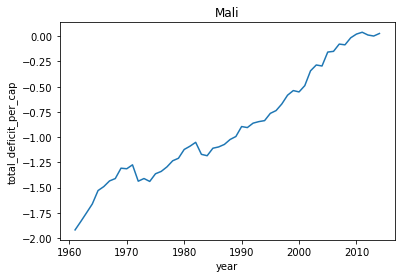

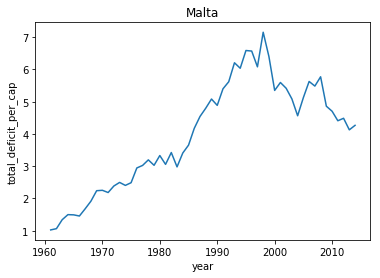

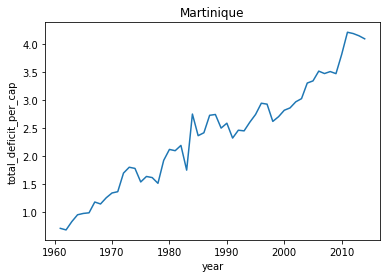

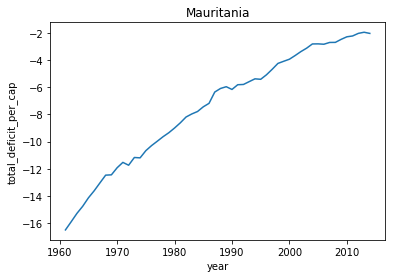

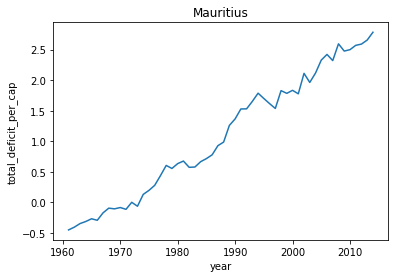

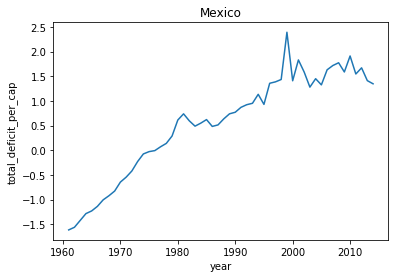

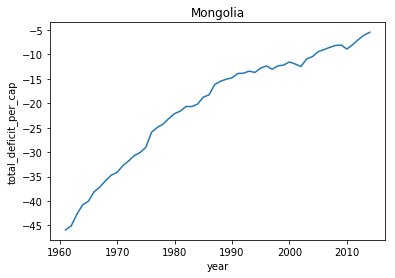

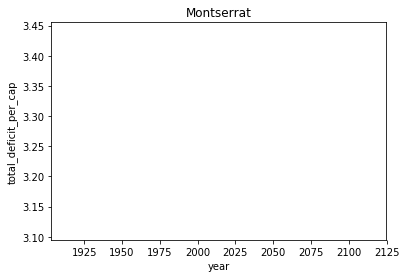

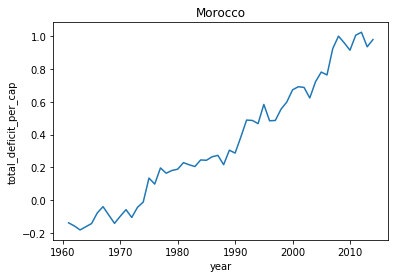

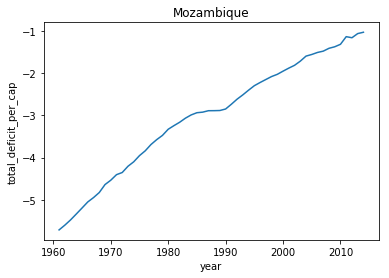

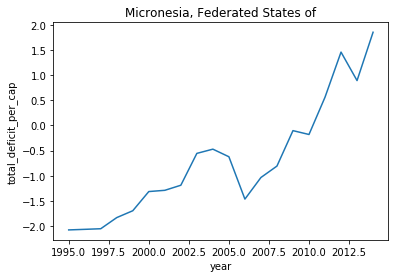

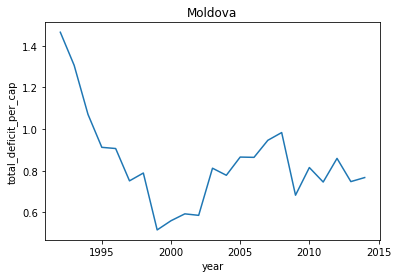

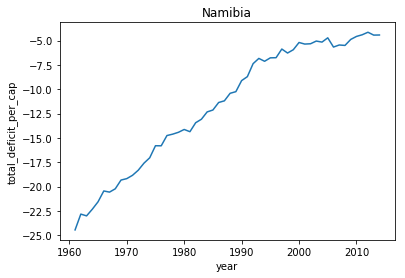

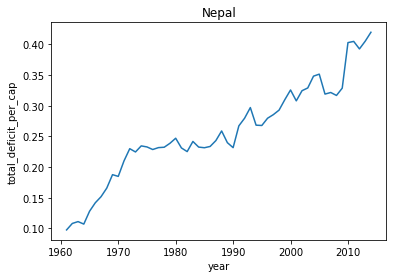

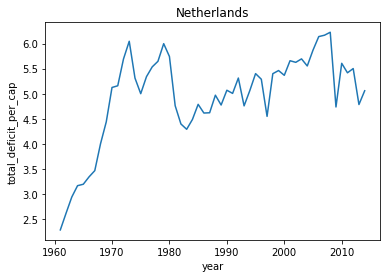

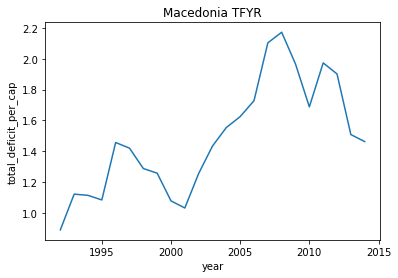

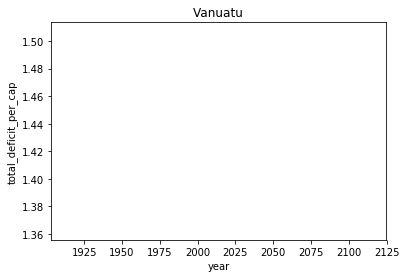

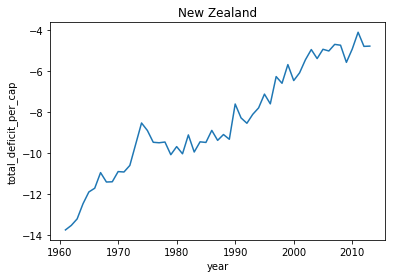

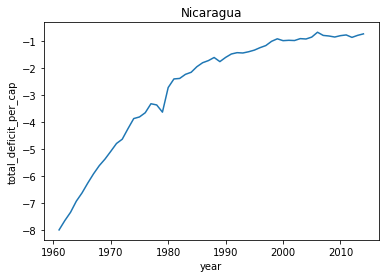

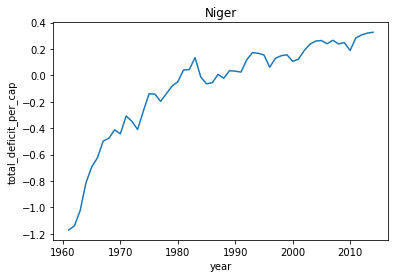

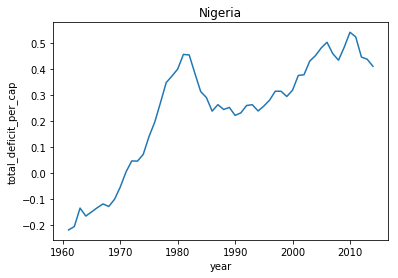

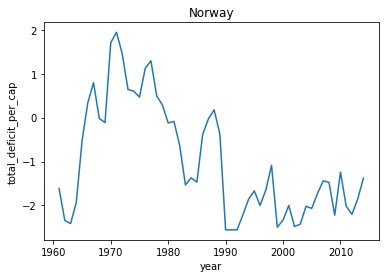

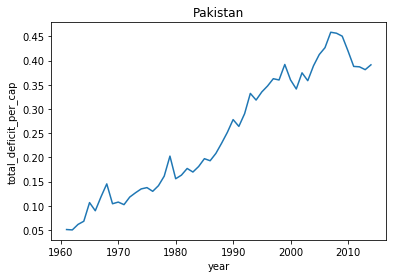

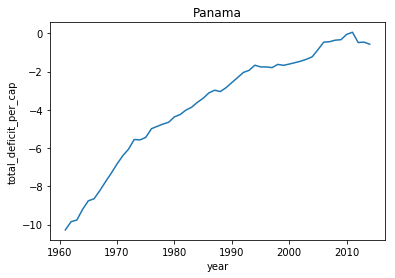

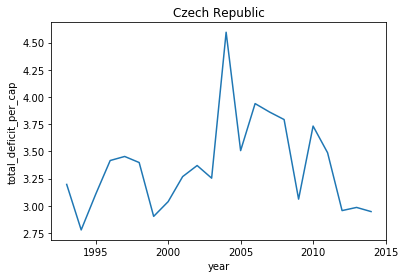

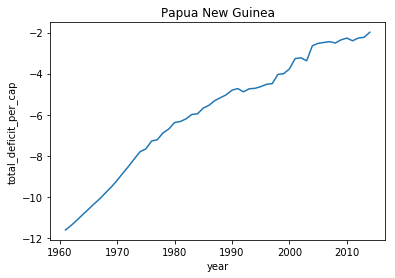

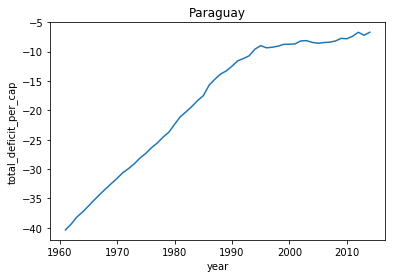

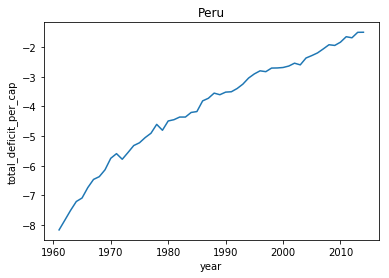

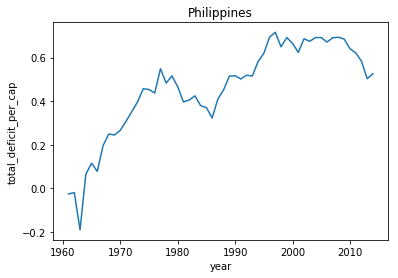

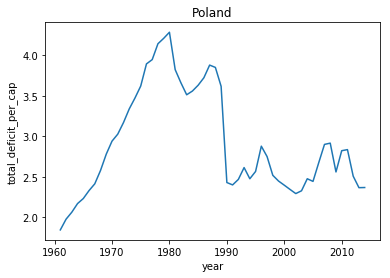

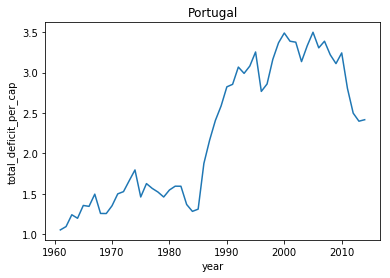

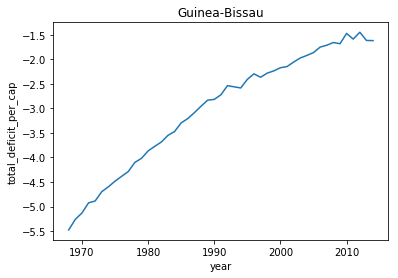

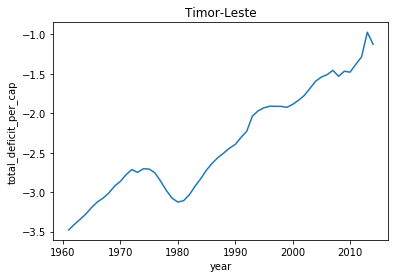

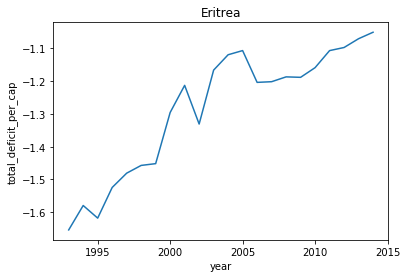

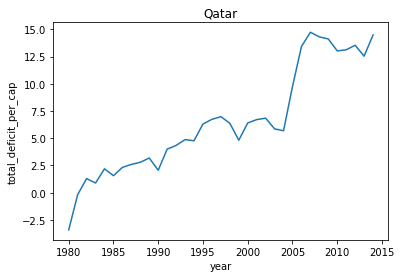

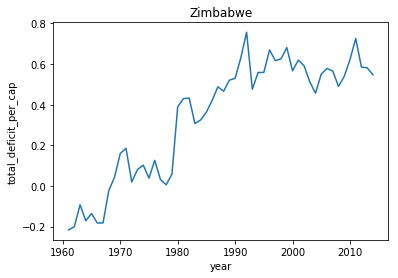

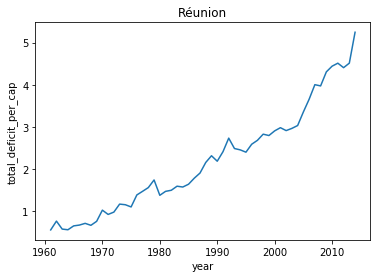

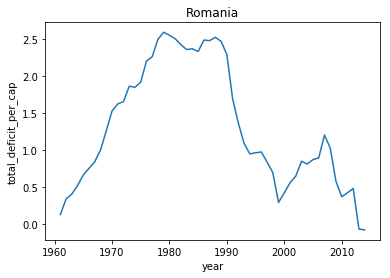

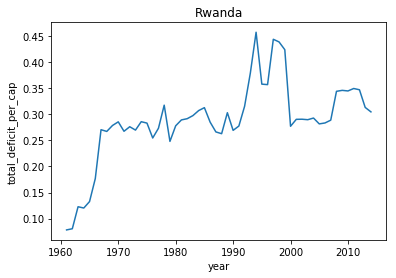

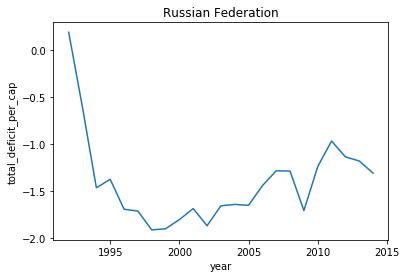

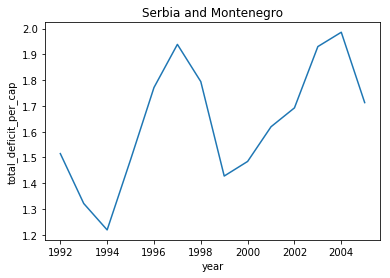

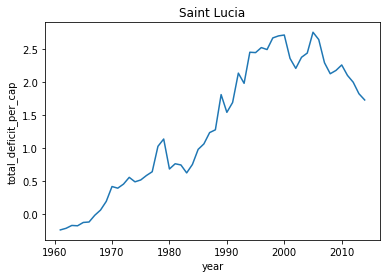

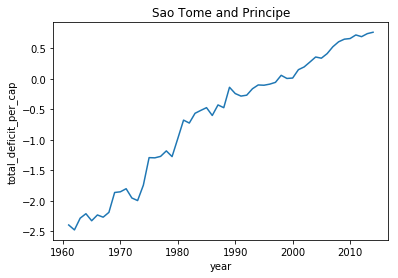

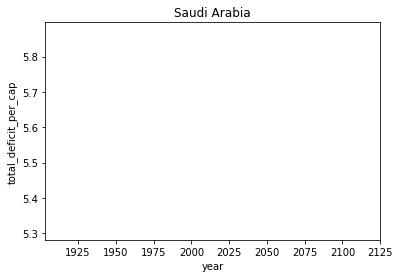

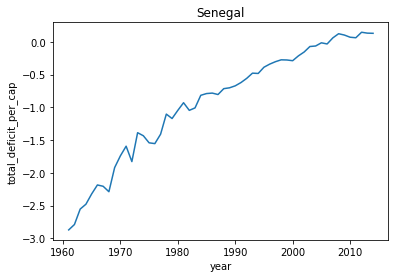

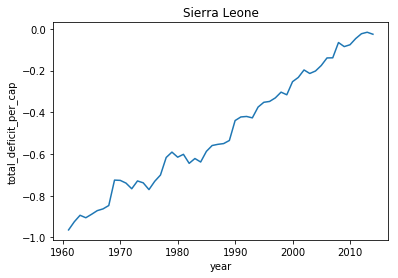

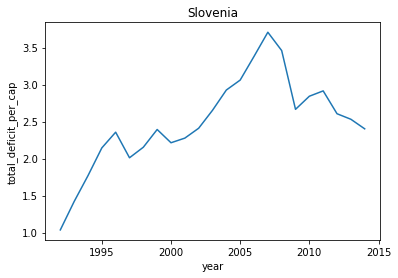

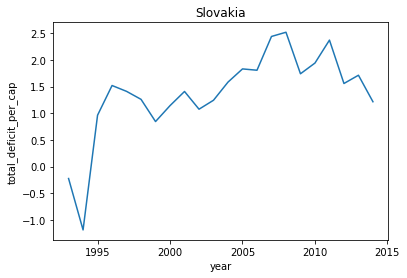

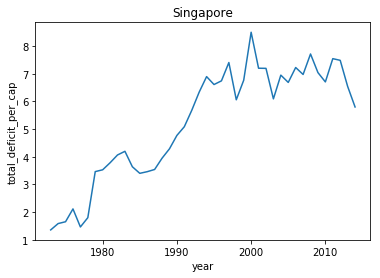

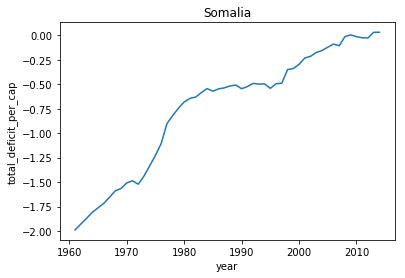

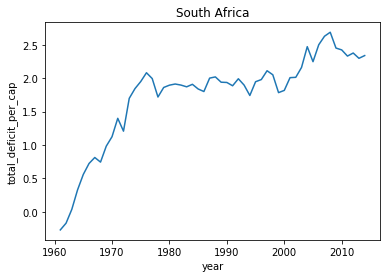

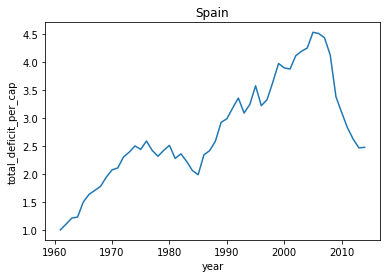

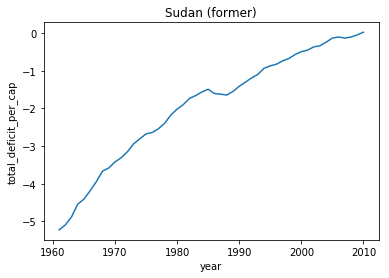

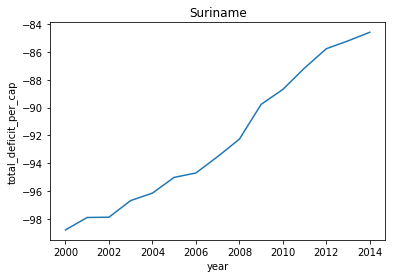

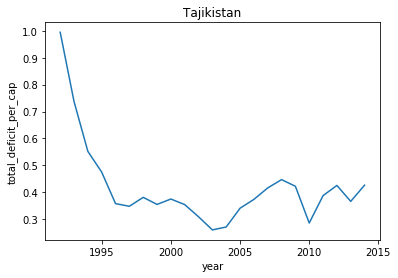

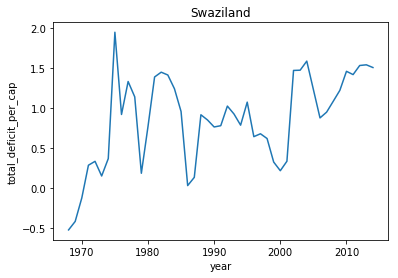

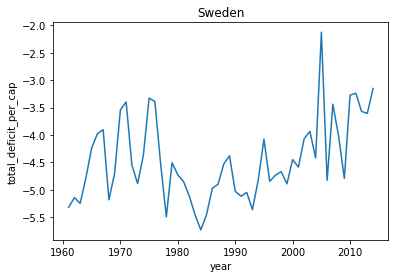

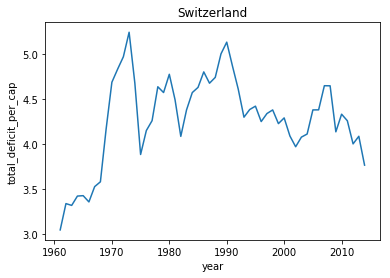

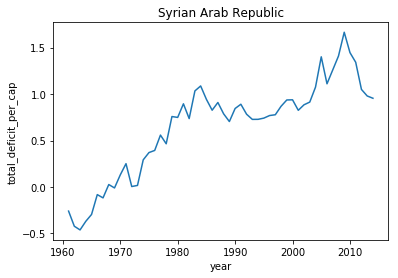

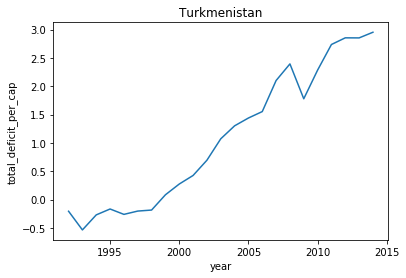

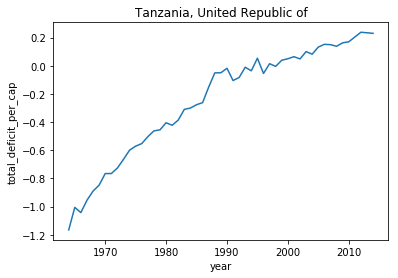

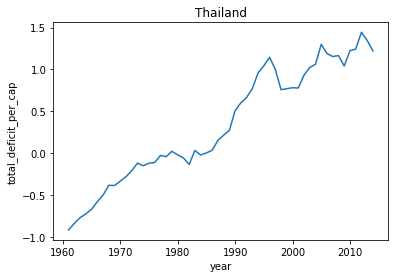

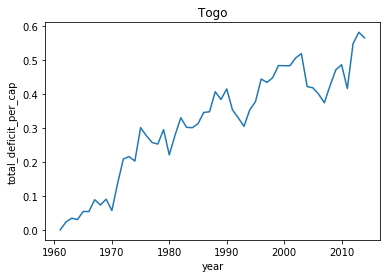

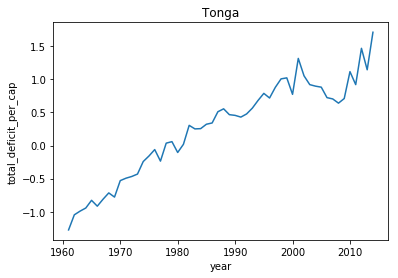

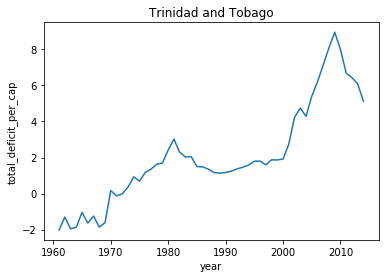

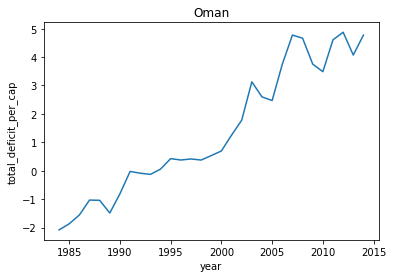

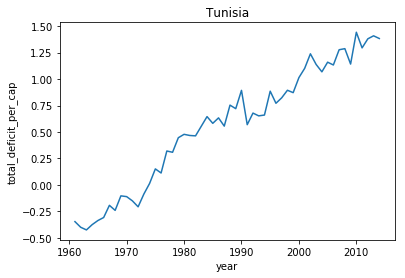

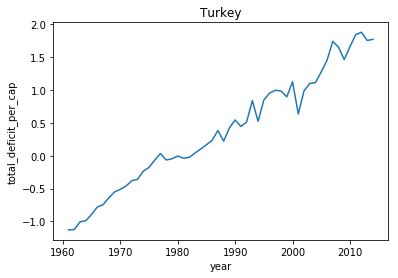

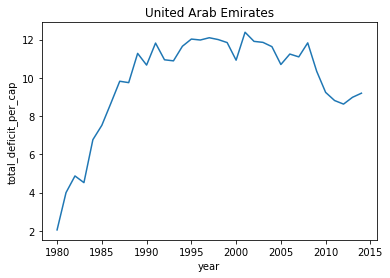

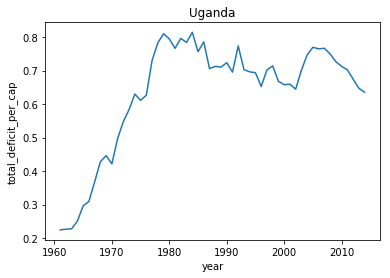

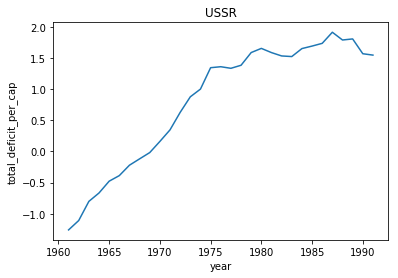

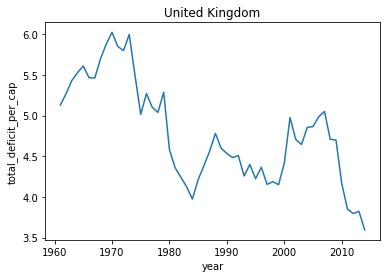

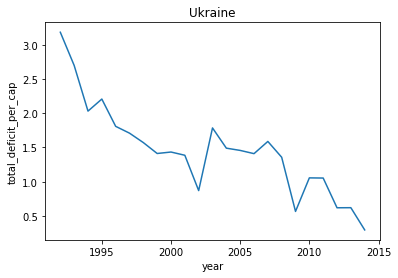

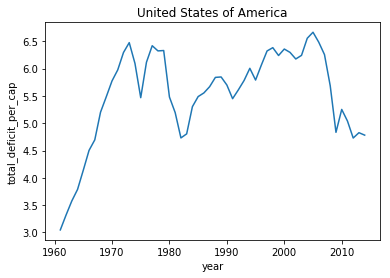

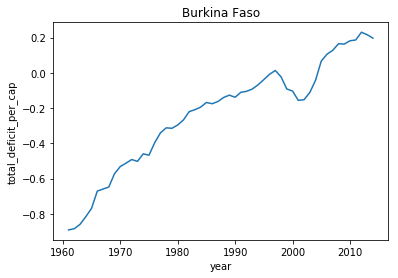

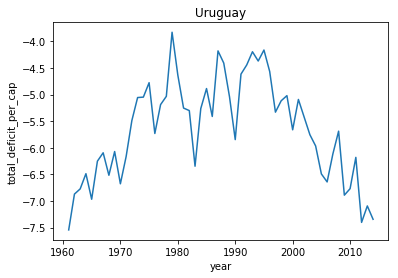

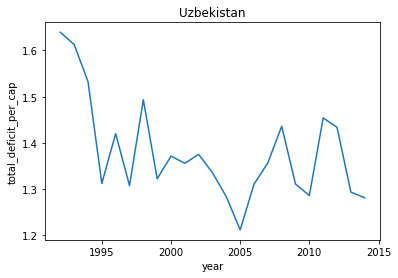

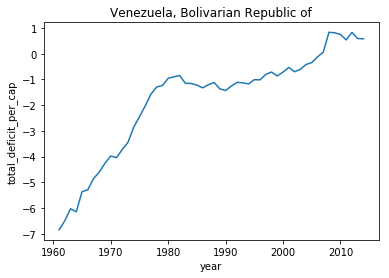

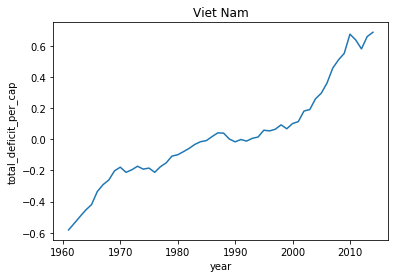

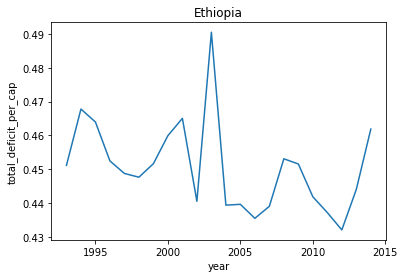

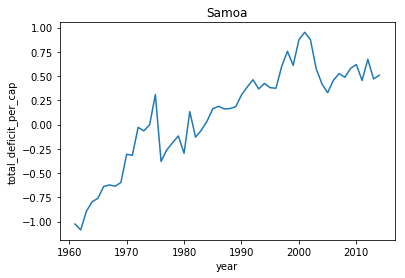

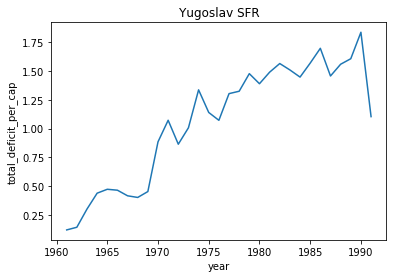

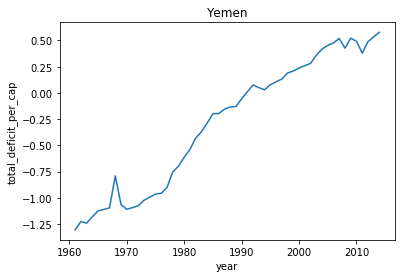

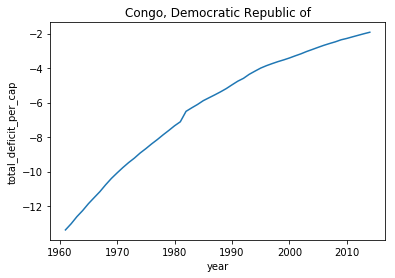

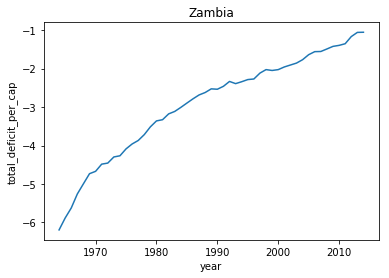

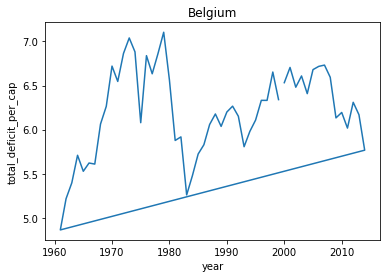

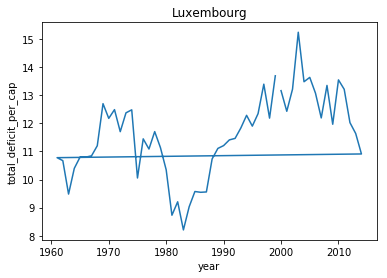

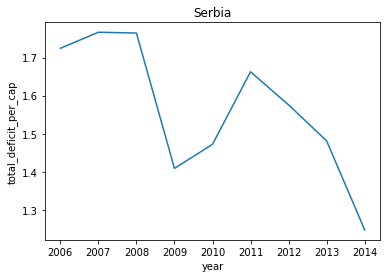

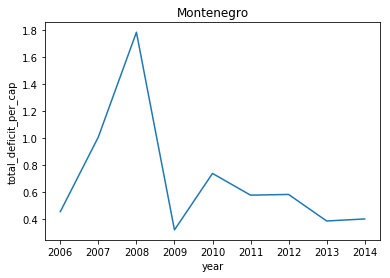

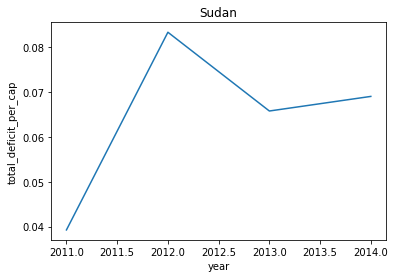

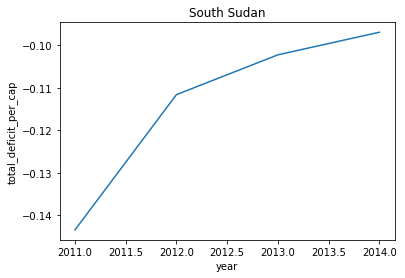

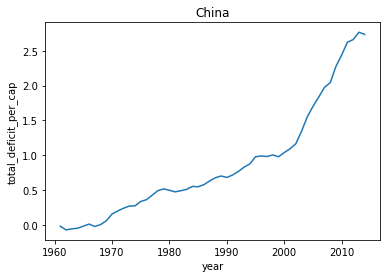

In [83]:
#Print each country's graph of ecological deficit over time
for i in df_slim["country"].unique():
    df_curr = df_slim[["total_deficit_per_cap","year"]].loc[df_slim["country"] == i]
    
    plt.figure()
    plt.plot(df_curr["year"], df_curr["total_deficit_per_cap"])
    plt.xlabel("year")
    plt.ylabel("total_deficit_per_cap")
    plt.title(i)

In [84]:
#Function to plot the line graph of carbon footprint, biodiversity, and deficit over time, as well as the  
#per capita values for each of these
def plot_timeseries(country):
    plt.figure(figsize=(15, 12))

    plt.subplot(3,2,1)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_deficit_per_cap"].loc[df_slim["country"]==country])
    plt.xlabel("year")
    plt.ylabel("total deficit per cap")
    plt.title(str(country+ " deficit over time"))

    plt.subplot(3,2,3)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_BiocapPerCap"].loc[df_slim["country"]==country])
    plt.xlabel("year")
    plt.ylabel("total biocapacity per cap")
    plt.title(str(country+ " biocapacity over time"))

    plt.subplot(3,2,5)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_EFConsPerCap"].loc[df_slim["country"]==country])
    plt.xlabel("year")
    plt.ylabel("total carbon foorprint per cap")
    plt.title(str(country+ " carbon foorprint over time"))

    plt.subplot(3,2,2)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_deficit"].loc[df_slim["country"]==country]/1000000000)
    plt.xlabel("year")
    plt.ylabel("total deficit (billion)")
    plt.title(str(country+ " deficit over time"))

    plt.subplot(3,2,4)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_BiocapTotGHA"].loc[df_slim["country"]==country]/1000000000)
    plt.xlabel("year")
    plt.ylabel("total biocapacity (billion)")
    plt.title(str(country+ " biocapacity over time"))

    plt.subplot(3,2,6)
    plt.plot(df_slim["year"].loc[df_slim["country"]==country],df_slim["total_EFConsTotGHA"].loc[df_slim["country"]==country]/1000000000)
    plt.xlabel("year")
    plt.ylabel("total carbon foorprint (billion)")
    plt.title(str(country+ " carbon foorprint over time"))


    plt.tight_layout()
    plt.show()
    


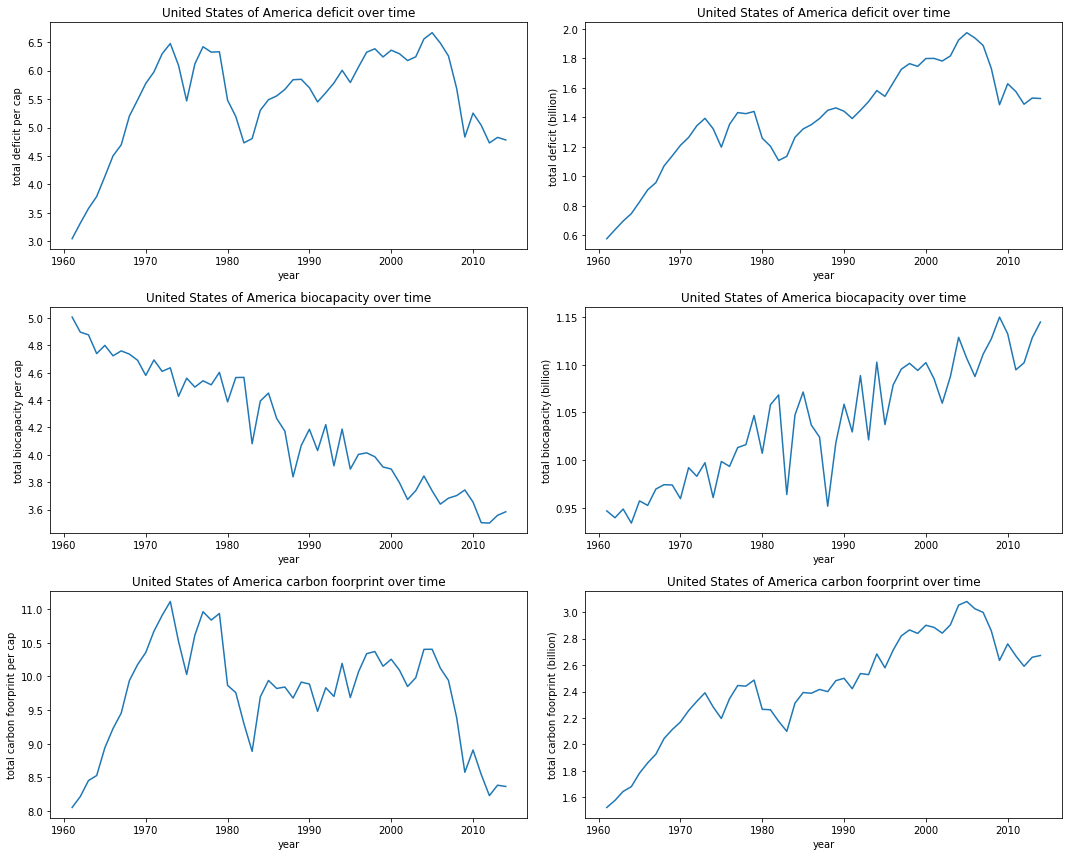

In [85]:
plot_timeseries("United States of America")

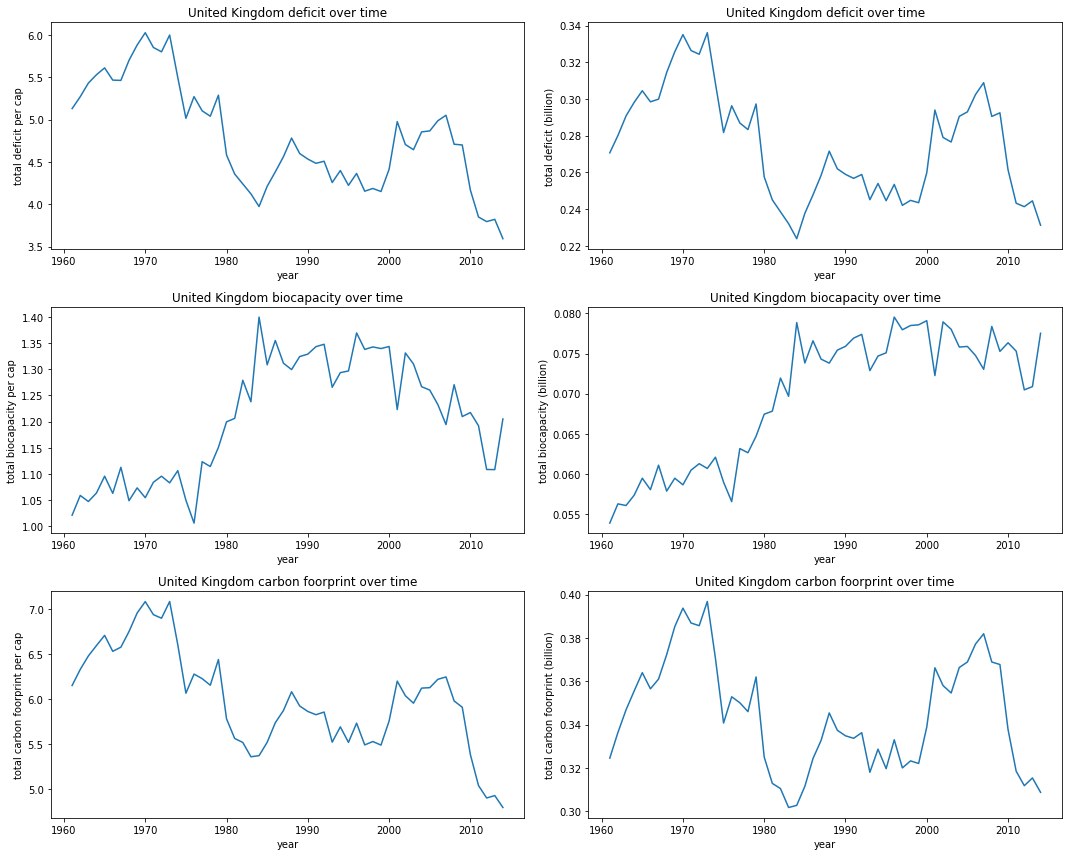

In [86]:
plot_timeseries("United Kingdom")

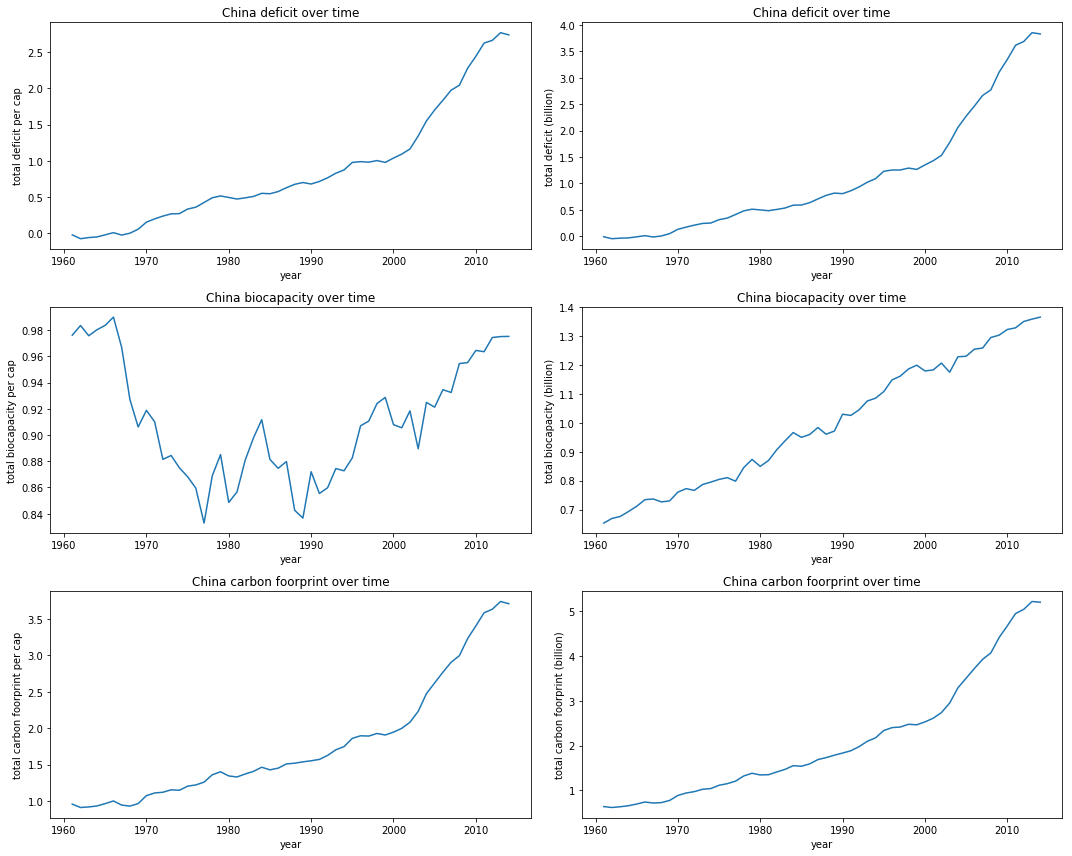

In [87]:
plot_timeseries("China")

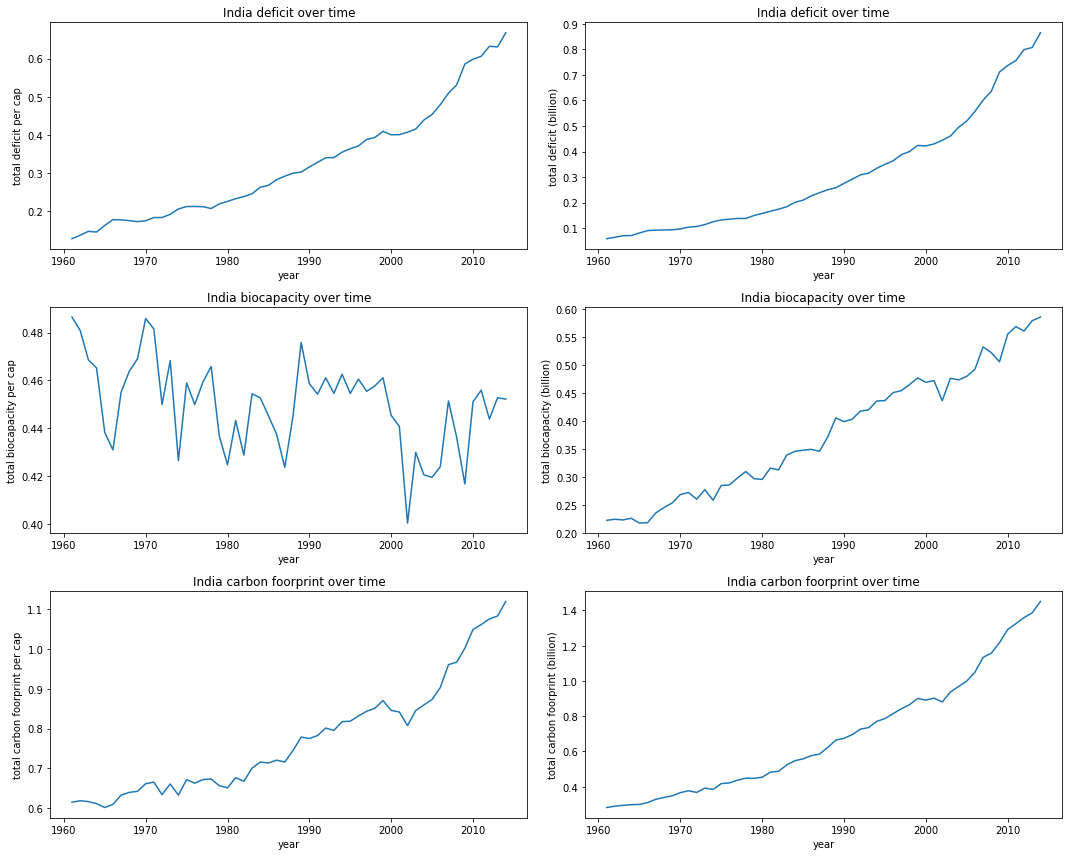

In [88]:
plot_timeseries("India")

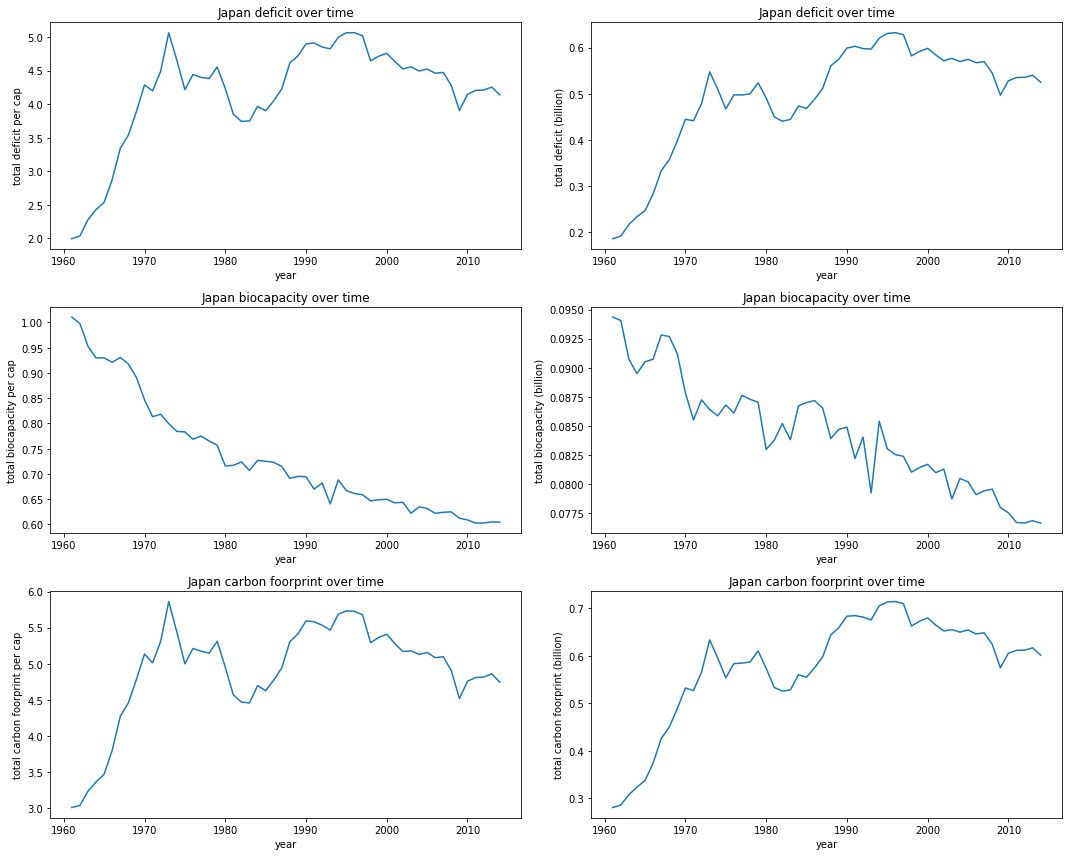

In [89]:
plot_timeseries("Japan")

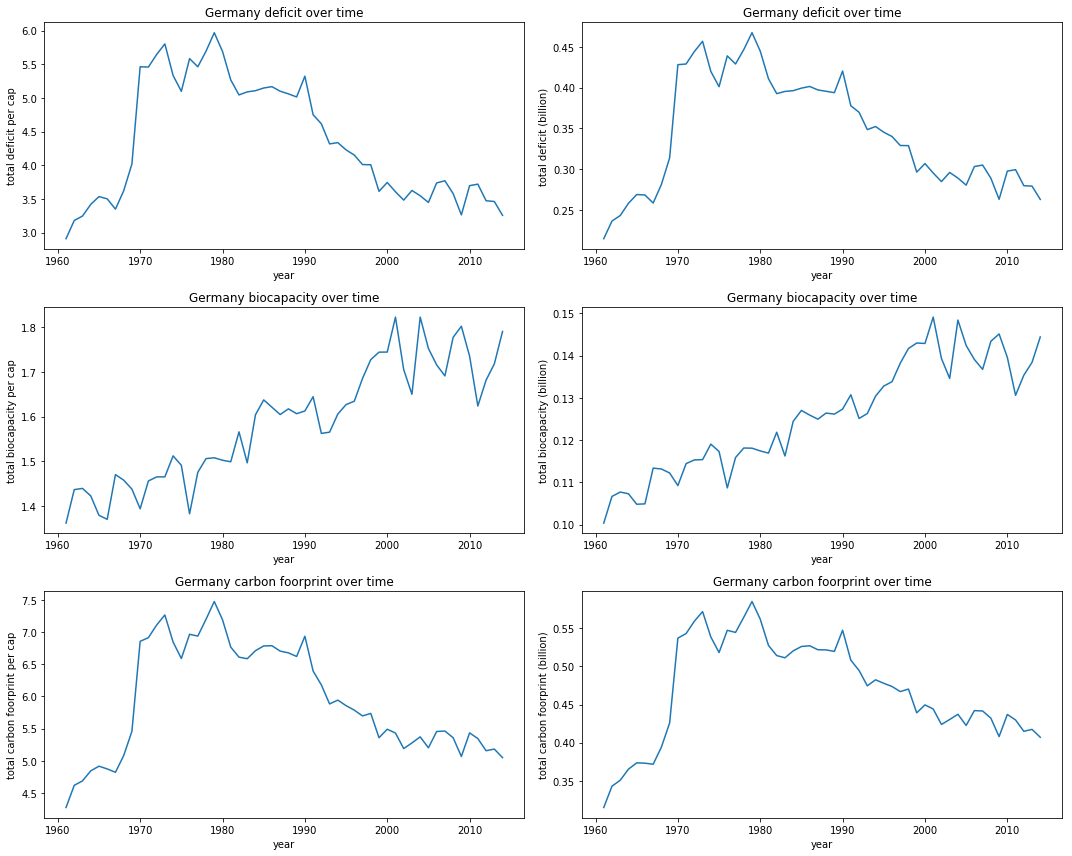

In [90]:
plot_timeseries("Germany")

In [92]:
#Look into the deficit share of the countries with the biggest ecological deficit. 
df_slim_2014["deficit_share"] = df_slim_2014["total_deficit"]/df_slim_2014["total_deficit"].sum()
df_slim_2014.sort_values(by = "total_deficit", ascending = False)[["country","deficit_share"]].head(5)

country  deficit_share
8569                     China       0.478971
7954  United States of America       0.191041
3420                     India       0.108187
3902                     Japan       0.065639
2816                   Germany       0.032846